In [4]:
import keras
keras.__version__
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
import os
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In this script, we want to use Deep Learning approach to classify our text documents into three categories: request, complain and compliment.
First, let's read in the text data and preprocess it to obatin the text and associated lables 

In [5]:

labels = []
texts = []
f = open('tweets_large.csv','r')
for line in f:
            #print(line)
    split_line=line.rstrip().replace('"','').split(",")
    cat=split_line[-1]
    text=','.join(split_line[:len(split_line)-1])
    texts.append(text)
    labels.append(cat)
f.close()


Let's take a look of the texts and labels

In [6]:
texts[:5]
labels[:5]
len(texts)
len(labels)


['Flying in The States used to be a pleasant experience. Thanks for ruining that',
 'are box allowed as checked in luggage?',
 'hello, i was unable to add my skymiles # to my trip today. can you help me?',
 'hey  can I transfer my points earned from flying to hilton honor points?',
 'will be missing flight 3453 to Columbia due to closed precheck and inefficient security at ORD. Any suggestions?']

['complaint', 'request', 'request', 'request', 'request']

19794

19794

we can see that we have in totoal 19794 text entries
Let's look at the distributions of the labels

In [7]:
import collections
counter=collections.Counter(labels)
count_normalized={k:v/19794 for k,v in counter.items()}
print(counter)
print(count_normalized)

Counter({'complaint': 7132, 'compliment': 6392, 'request': 6270})
{'request': 0.3167626553501061, 'compliment': 0.32292613923411134, 'complaint': 0.36031120541578254}


<Container object of 3 artists>

([<matplotlib.axis.XTick at 0x7f8da92fca58>,
 <a list of 3 Text xticklabel objects>)

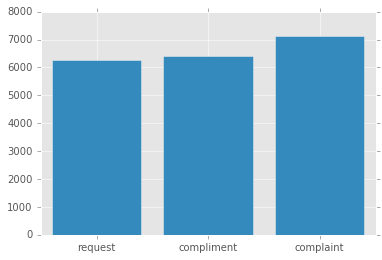

In [8]:
plt.bar(range(len(counter)), list(counter.values()), align='center')
plt.xticks(range(len(counter)), list(counter.keys()))
plt.show()

we can see the three categories have more or less equal counts 
now let's see the length distribtuon of those texts

In [9]:
## check the length of the text
length_text=[len(s) for s in texts]
#length_text
print('Maximum length of texts is:')
max(length_text)

import statistics
print('Average length of texts is:')
sum(length_text)/len(length_text)

print('Median length of texts is:')
statistics.median(length_text)

Maximum length of texts is:


179

Average length of texts is:


95.79018894614529

Median length of texts is:


102.0

In [10]:
#!pip install pillow

In [11]:
## plot length distribution

import matplotlib.pyplot as plt
#import numpy as np
#%matplotlib inline
#x = np.random.normal(size = 1000)
plt.hist(length_text)
plt.ylabel('Count')
plt.xlabel('Ticket Text Length(word)')
plt.savefig('TicketLength.jpg')

(array([  174.,   712.,  1551.,  2143.,  3038.,  3830.,  6092.,  2213.,
           28.,    13.]),
 array([   4. ,   21.5,   39. ,   56.5,   74. ,   91.5,  109. ,  126.5,
         144. ,  161.5,  179. ]),
 <a list of 10 Patch objects>)

It turns out that the maximum length of document has huge impact on the performance of the neural network classifier 

### Tokenize the data


Let's vectorize the texts we collected, and prepare a training and validation split.


In [12]:


maxlen = 120  # We will cut each text after 120 words
#training_samples = 16000  # We will be training on 16000 samples
#validation_samples = 3600  # We will be validating on 3600 samples
max_words = 13000  # We will only consider the top 13,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

Found 13849 unique tokens.


Let's transform three class Y into dummy variables(one hot encoded vector)

In [13]:

encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(labels)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_labels = np_utils.to_categorical(encoded_Y)

LabelEncoder()

In [14]:
## look at the lables before and after the transformation

In [15]:
labels[:5]
dummy_labels[:5]


['complaint', 'request', 'request', 'request', 'request']

array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

In [16]:
#labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', dummy_labels.shape)

Shape of data tensor: (19794, 120)
Shape of label tensor: (19794, 3)


In [17]:
training_samples=round(data.shape[0]*0.8)
training_samples

15835

In [18]:
# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
#indices = np.arange(data.shape[0])
#np.random.shuffle(indices)
#data = data[indices]
#dummy_labels = dummy_labels[indices]

#x_train = data[:training_samples]
#y_train = dummy_labels[:training_samples]
#x_val = data[training_samples: training_samples + validation_samples]
#y_val = dummy_labels[training_samples: training_samples + validation_samples]

In [19]:
# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
np.random.seed(0)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

In [20]:
data = data[indices]
dummy_labels = dummy_labels[indices]

In [21]:
x_train = data[:training_samples]
y_train = dummy_labels[:training_samples]
x_test = data[training_samples: ]
y_test = dummy_labels[training_samples: ]

In [22]:
## look at raw text



In [23]:
texts[:5]

['Flying in The States used to be a pleasant experience. Thanks for ruining that',
 'are box allowed as checked in luggage?',
 'hello, i was unable to add my skymiles # to my trip today. can you help me?',
 'hey  can I transfer my points earned from flying to hilton honor points?',
 'will be missing flight 3453 to Columbia due to closed precheck and inefficient security at ORD. Any suggestions?']

In [24]:
Shuffled_text=[texts[i]for i in indices]
text_train=Shuffled_text[:training_samples]
text_test=Shuffled_text[training_samples:]

In [25]:
text_train[:5]

["Hi  Heads up your #website won't allow customers to book a flight to LHR",
 'Thank you   for the economy comfort upgrade #Delta',
 "Thanks  I didn't like that luggage anyway ",
 "Somehow in the past 2 days I lost 7 upgrade credits! Any idea what happened? I've had several similar issues since the merger",
 'Thought being a 360 diamond with  meant something. Terrible curbside experience today.']

In [26]:
ordered_labels=[labels[i] for i in indices]
y_test_label=ordered_labels[training_samples:]
y_train_label=ordered_labels[:training_samples]

In [22]:
## write formatted train and test file for fasttext classifier

f=open('TrainingText_for_fasttext.txt','w')
for i, ticket in enumerate(text_train):
    f.write('__label__%s\t%s\n'%(y_train_label[i],ticket))
f.close()



92

71

63

143

106

149

46

107

120

73

81

146

146

116

139

93

92

128

159

148

153

140

136

114

134

85

142

126

153

79

139

146

153

125

100

108

135

142

144

92

123

137

133

91

135

129

143

88

49

73

131

98

134

143

138

132

117

144

122

116

146

60

37

76

90

143

84

63

129

77

149

141

142

139

73

141

44

148

70

147

114

85

147

132

139

148

87

140

136

150

152

76

119

87

113

152

153

108

76

133

119

142

96

81

127

123

129

139

134

144

126

69

78

112

65

79

86

134

105

113

102

143

141

150

144

81

121

122

151

148

85

144

80

125

68

111

119

138

94

73

96

140

114

121

149

59

119

172

69

96

139

138

100

34

69

64

112

143

141

142

156

136

138

51

114

145

147

140

146

86

100

95

149

153

96

128

86

120

118

110

133

122

105

92

143

121

147

108

142

74

134

59

144

142

93

142

136

146

148

59

116

145

35

145

114

107

105

147

128

138

113

110

102

116

110

124

112

145

126

157

127

90

95

131

145

45

115

97

108

58

133

143

147

145

141

108

126

114

128

147

102

94

49

151

124

148

131

147

91

54

152

113

109

99

132

68

144

98

142

121

89

107

147

105

144

131

147

140

86

115

140

82

113

72

162

147

114

143

129

145

50

102

68

47

109

147

101

143

140

149

77

128

142

111

150

144

143

127

99

127

125

88

62

152

152

114

128

109

129

146

69

42

132

130

125

82

142

121

124

138

112

82

125

122

106

128

147

121

133

119

108

76

138

108

126

76

107

28

140

155

120

116

131

121

87

145

140

147

66

146

114

64

151

142

106

148

118

103

129

113

146

147

104

150

127

150

106

136

117

91

129

141

75

97

96

108

90

98

151

79

111

148

130

145

99

97

78

64

124

145

147

79

87

126

145

140

148

148

80

83

133

133

139

185

70

67

129

65

147

121

109

115

125

126

142

103

119

66

148

53

133

45

153

133

81

88

151

142

151

139

87

102

71

56

106

126

105

116

136

88

142

146

92

102

73

69

147

129

111

149

145

145

137

124

73

139

70

57

152

94

106

140

92

108

108

133

100

73

119

108

105

145

117

141

60

142

143

61

43

123

91

97

115

45

141

45

71

119

150

124

141

83

75

137

79

139

139

133

52

101

136

102

95

115

81

155

124

144

132

138

148

146

91

130

149

119

145

130

62

147

103

145

101

78

96

147

125

75

78

91

70

122

129

125

109

127

126

66

156

57

136

140

130

145

130

107

106

143

124

42

102

149

131

145

130

88

94

137

48

145

142

148

113

131

102

82

52

132

146

126

88

151

150

100

110

102

134

90

46

144

68

103

132

125

112

120

131

84

136

144

142

151

136

143

145

132

127

140

147

155

79

148

128

143

80

102

134

93

83

117

125

129

103

76

133

139

108

136

102

144

138

146

139

145

143

122

90

78

128

126

73

151

112

70

77

144

67

136

149

144

120

95

77

63

82

97

138

147

115

130

102

88

92

118

147

41

121

149

132

58

103

142

112

106

119

146

86

79

106

111

149

126

116

100

126

143

131

112

155

140

84

145

139

90

66

136

148

124

116

134

115

131

129

148

93

142

126

143

157

141

79

120

108

107

142

84

117

124

145

134

148

141

113

112

146

122

147

137

81

114

113

113

110

51

113

148

151

99

120

124

96

161

96

76

94

73

79

140

118

78

146

75

141

150

125

115

77

103

97

131

114

111

86

78

43

79

125

117

90

96

66

75

124

131

137

149

90

143

64

145

118

113

62

122

135

127

145

151

92

143

76

64

147

93

117

69

103

77

40

53

94

72

124

89

68

139

143

78

152

152

125

140

124

136

105

83

118

129

89

143

75

136

105

105

77

121

102

125

144

68

111

123

142

143

149

130

71

82

113

130

74

112

99

151

137

71

96

116

131

108

129

53

134

54

120

70

139

99

104

136

152

144

147

96

148

119

137

80

100

117

90

134

113

110

146

133

104

147

160

86

146

129

130

135

115

96

44

115

148

112

136

83

87

103

137

97

122

85

119

153

131

114

72

148

67

131

117

151

89

129

97

122

106

171

68

153

126

102

92

120

108

149

38

105

128

82

92

103

143

98

152

130

128

49

149

143

123

114

147

134

120

48

108

146

97

128

125

104

147

105

75

102

44

49

147

143

112

97

150

111

58

125

116

126

111

126

139

147

94

143

133

142

140

138

153

139

67

103

97

109

146

138

126

144

84

104

138

134

135

71

148

145

111

90

95

145

120

146

146

127

144

54

30

103

112

148

124

76

70

152

108

127

61

141

142

133

143

107

78

159

129

79

71

146

110

132

88

155

117

53

146

69

119

152

132

98

146

150

68

149

120

72

77

131

101

70

134

58

145

69

109

117

88

146

150

43

147

105

60

107

147

138

111

135

75

147

125

54

136

78

111

142

142

33

69

150

68

98

146

148

57

141

137

139

56

140

135

120

40

83

136

112

78

114

152

134

120

148

132

82

107

101

146

100

108

148

149

129

142

146

149

147

140

123

126

109

76

81

128

104

51

150

120

81

144

146

65

58

137

145

117

113

142

141

128

59

96

144

112

152

146

82

154

72

101

107

113

135

96

149

98

141

131

144

148

88

91

96

125

109

126

76

127

144

144

144

120

116

134

136

145

73

144

96

140

138

132

141

147

130

105

150

64

71

69

119

137

129

100

116

77

70

90

128

108

83

107

145

124

136

83

140

136

99

148

110

98

118

128

54

105

114

121

69

149

100

141

61

79

91

103

82

89

145

113

76

76

121

133

126

77

147

137

121

134

106

111

72

145

100

153

122

131

153

166

101

42

99

115

138

143

137

122

112

138

93

136

81

90

112

55

120

77

129

158

147

133

90

149

139

121

53

130

89

158

106

142

122

142

44

147

148

124

75

41

119

108

145

68

82

137

119

42

135

134

117

116

146

151

143

145

71

153

120

78

94

100

93

125

56

110

117

123

112

56

90

135

147

84

115

123

109

57

79

103

133

116

92

124

144

100

66

36

119

82

115

60

63

116

144

114

118

140

82

86

135

100

77

64

129

141

144

119

144

94

149

100

144

138

147

144

81

142

134

102

148

85

137

79

76

101

34

120

108

95

103

147

152

92

64

57

144

129

139

113

120

124

102

126

107

64

152

148

110

156

114

129

93

89

69

112

128

129

65

148

139

85

69

135

124

135

146

146

122

72

147

112

103

126

137

134

119

58

156

77

147

87

71

149

97

107

123

155

120

146

143

105

90

107

77

97

79

154

102

156

28

108

95

71

82

46

114

121

106

133

120

109

107

141

82

137

148

76

84

128

91

149

148

139

148

81

138

115

137

140

56

127

70

149

76

95

104

147

55

142

132

148

145

121

69

136

141

137

152

146

94

148

144

145

99

148

140

131

115

101

144

96

103

102

139

135

73

138

151

120

121

142

123

86

86

93

105

138

136

73

101

145

124

109

120

72

142

117

148

30

149

78

46

137

103

60

70

116

130

97

144

102

122

107

86

131

151

125

99

146

119

79

102

145

88

89

124

82

147

151

149

150

144

44

104

100

139

148

91

105

111

103

138

124

44

151

149

147

136

131

116

116

97

149

140

124

85

114

98

144

99

130

104

83

81

124

118

147

89

88

146

83

141

120

49

52

142

137

113

61

150

145

126

115

121

147

142

142

113

148

144

106

55

119

130

143

115

142

134

139

85

145

98

53

51

90

142

125

160

132

111

110

122

137

85

56

110

105

131

120

144

144

132

144

131

81

82

45

71

98

140

82

90

60

96

68

134

100

92

119

119

140

140

68

46

68

73

71

125

123

121

144

77

85

128

101

123

73

64

137

101

147

127

69

123

115

132

91

105

132

80

101

88

143

151

95

146

145

154

77

140

79

154

150

144

134

140

146

147

94

75

129

111

123

106

110

133

114

100

71

125

73

125

141

61

116

122

139

121

153

125

73

144

132

143

155

107

119

135

147

125

142

149

105

153

90

159

105

124

140

132

120

148

132

143

149

44

100

130

118

152

80

117

152

144

135

147

150

111

130

127

122

95

140

110

109

114

121

150

135

101

64

144

97

143

114

145

128

85

146

150

116

155

69

103

145

124

61

99

125

152

72

143

101

72

127

136

81

144

148

152

117

149

111

86

102

134

108

143

156

104

128

95

53

70

143

75

83

127

123

129

108

146

147

145

138

46

152

118

138

115

145

145

105

149

139

94

144

54

105

76

112

94

138

108

82

117

81

124

116

145

135

95

61

67

120

147

138

148

145

30

131

125

144

140

146

145

84

108

51

69

48

151

106

143

74

115

129

128

144

68

84

150

155

117

121

141

90

134

152

72

151

125

143

130

114

118

104

142

140

105

137

122

47

115

88

95

55

127

113

146

110

146

124

150

153

84

117

94

129

108

125

141

120

120

144

113

114

144

86

115

114

144

129

79

118

136

140

140

161

143

148

100

145

109

63

69

135

75

89

141

110

122

128

144

78

150

123

50

120

107

106

131

143

99

131

99

131

49

142

141

139

130

118

103

126

138

99

67

146

50

80

78

139

113

68

107

141

77

80

59

120

77

141

44

122

185

149

133

69

142

135

144

37

110

117

136

137

150

100

141

79

144

132

143

143

61

114

139

151

137

86

145

91

124

72

110

136

109

151

145

127

141

150

142

152

93

137

133

126

128

122

125

120

29

143

136

80

110

147

72

94

128

131

140

73

141

118

95

116

134

143

123

104

112

138

130

72

145

136

62

146

137

122

110

142

99

111

131

116

73

144

149

141

141

142

99

90

118

93

86

96

142

123

142

144

100

147

80

81

140

130

147

93

134

60

76

147

108

106

88

104

92

80

82

83

150

96

129

60

146

147

49

110

135

153

151

146

117

89

154

75

93

117

52

61

95

142

133

148

107

134

79

124

118

147

116

81

71

133

142

153

76

110

138

107

61

150

142

89

147

119

143

116

91

138

129

107

72

84

120

93

124

121

125

110

119

59

148

135

92

132

44

118

146

115

134

136

77

82

151

147

117

96

95

131

108

82

138

110

142

130

57

83

100

148

142

134

141

124

124

90

113

108

149

132

143

140

148

144

102

124

152

142

115

123

121

149

114

134

120

140

131

92

94

71

153

138

145

119

123

141

110

56

145

48

148

89

129

136

144

139

119

93

101

142

108

77

145

153

127

142

148

146

145

107

124

141

137

151

129

139

72

118

145

147

125

108

84

116

118

69

154

129

87

140

79

47

140

135

150

105

137

45

137

80

95

126

76

85

122

108

145

148

146

107

123

92

119

138

152

76

152

143

145

99

125

67

82

66

136

138

50

152

125

81

112

144

75

107

141

129

130

136

82

90

127

110

114

126

146

141

112

129

79

41

104

108

147

104

117

146

107

110

62

145

96

147

121

95

130

122

145

86

122

125

73

139

147

133

88

145

90

116

131

144

141

119

129

116

51

116

120

109

136

148

145

152

145

85

144

122

131

100

141

119

121

107

152

85

117

144

141

110

115

118

149

98

91

124

91

112

133

80

140

104

136

148

135

108

75

142

73

111

111

146

135

128

124

94

145

85

129

127

116

150

54

144

120

140

134

112

134

137

124

131

136

131

95

149

152

125

93

117

140

73

95

94

77

55

147

133

134

143

108

105

48

85

145

143

139

145

140

110

141

115

147

52

126

135

99

115

65

132

131

119

137

117

142

144

144

72

88

132

140

125

137

77

145

127

70

100

145

135

93

88

118

142

97

124

116

148

128

38

144

111

129

128

125

127

72

142

111

114

101

150

56

117

144

121

117

45

147

119

154

141

106

145

138

134

76

43

86

115

135

112

136

103

74

128

135

137

118

113

142

79

64

151

129

135

144

101

64

140

156

93

107

137

144

135

141

131

105

99

134

144

138

128

128

119

123

132

122

137

59

64

138

109

130

123

140

114

131

146

97

80

79

135

90

81

50

61

117

100

152

95

133

147

96

113

153

135

102

144

111

151

150

149

124

48

125

107

128

96

143

116

139

119

152

142

109

134

134

102

141

129

157

142

153

81

121

147

125

143

63

144

100

143

147

143

89

109

49

82

95

144

57

145

35

102

127

91

120

146

115

105

116

143

104

146

121

151

131

83

96

133

83

82

106

96

73

86

122

128

141

95

128

146

82

112

106

137

102

128

147

80

92

147

145

85

120

95

141

96

132

135

104

61

49

149

115

137

80

138

70

80

140

72

146

76

82

135

134

141

117

92

115

59

84

98

142

153

130

70

104

144

142

146

138

119

117

50

116

124

52

141

90

141

144

94

162

148

124

132

117

136

76

105

74

140

137

137

142

142

135

145

80

136

57

151

106

142

136

144

152

83

159

106

114

68

86

57

110

144

90

129

144

125

145

90

146

143

151

148

146

138

140

60

88

96

138

145

145

83

137

125

140

90

118

136

93

116

112

87

115

97

119

109

76

144

48

120

72

144

105

112

122

143

144

47

74

127

115

85

118

106

145

125

88

126

97

127

83

67

89

38

107

89

133

48

135

73

94

123

141

121

136

62

131

145

141

121

143

134

110

108

114

76

124

60

62

146

93

111

108

140

143

139

110

134

149

111

131

132

121

125

78

93

72

122

135

128

149

127

110

50

108

110

44

128

86

133

91

108

139

119

103

104

146

98

112

145

148

86

86

109

107

113

133

136

122

108

83

72

139

86

137

90

136

139

102

113

91

121

115

130

103

118

87

146

70

74

109

80

148

141

138

122

111

119

113

138

73

61

145

135

122

66

63

52

107

151

99

90

113

128

75

150

110

117

147

122

134

111

49

128

133

129

145

131

139

49

88

106

147

89

142

125

135

55

40

150

104

73

139

112

82

120

81

105

105

139

136

130

135

154

146

135

147

158

122

143

90

137

147

73

89

152

117

58

66

89

114

74

137

62

98

90

64

121

143

138

151

100

147

96

59

149

80

83

115

121

115

121

107

147

88

147

150

133

138

115

130

128

116

139

89

66

87

67

139

103

138

148

53

125

137

145

63

125

61

141

94

104

70

95

147

127

147

122

149

143

65

68

104

73

147

119

129

99

104

103

85

88

134

136

145

143

131

143

132

144

112

147

137

120

136

133

130

147

151

123

148

130

93

102

144

82

64

107

146

114

153

90

130

103

126

132

121

55

136

142

126

77

90

89

143

151

132

124

97

142

139

78

137

153

108

140

126

127

84

138

155

85

89

45

98

112

154

68

145

107

66

105

144

64

141

114

94

106

146

101

143

124

140

54

143

122

96

105

122

141

126

131

145

84

136

134

145

46

107

149

81

154

81

156

119

147

141

139

141

120

144

48

145

150

140

152

132

122

148

95

111

50

135

98

107

144

113

71

90

67

120

142

118

98

136

121

130

73

137

56

151

56

118

138

62

145

107

148

85

114

149

72

139

114

116

94

144

152

147

77

139

130

69

150

53

145

144

142

61

133

143

106

109

138

138

123

114

86

127

83

147

132

94

137

151

121

144

131

100

80

126

142

119

78

98

72

81

144

62

153

90

142

82

108

133

127

75

126

136

113

96

152

42

83

126

147

87

115

145

101

133

145

137

112

126

135

139

114

144

108

122

148

143

116

140

82

139

138

129

60

101

104

145

136

77

158

93

112

142

103

138

58

84

102

145

139

109

61

125

133

139

150

97

96

95

144

89

143

148

136

85

147

69

135

105

92

138

88

139

127

87

138

104

83

133

146

143

110

128

92

137

102

144

136

54

147

134

110

128

70

107

114

63

34

149

120

34

149

142

119

113

136

143

142

114

115

128

152

112

134

126

138

127

98

151

152

67

58

116

139

137

107

66

96

46

70

122

142

109

172

119

84

142

92

144

100

55

46

79

85

121

126

104

152

46

141

108

40

132

124

68

144

146

93

113

137

143

74

99

142

131

151

156

129

147

112

142

61

122

125

133

128

132

127

131

67

137

149

129

134

152

123

150

110

69

121

146

125

148

140

63

136

30

146

118

103

147

115

139

127

156

138

130

114

137

58

151

129

65

60

82

148

95

96

107

119

129

121

100

141

142

132

83

135

56

140

135

105

137

140

144

91

132

58

146

146

150

147

62

82

133

119

73

106

121

106

86

133

121

101

124

134

61

51

142

124

110

75

110

93

106

140

148

51

135

144

40

139

129

37

136

89

75

91

152

81

96

145

100

189

116

125

59

148

123

135

137

85

91

107

129

128

134

153

141

115

126

79

65

146

94

131

104

121

140

99

117

98

152

154

120

103

117

146

98

120

95

111

130

144

53

46

69

125

110

141

145

52

134

109

133

92

163

145

126

126

148

142

122

93

151

125

121

110

105

147

94

124

127

126

79

158

115

79

134

92

95

89

134

114

133

95

133

146

152

130

87

147

75

149

147

111

87

142

111

104

145

146

47

95

133

79

158

146

111

145

62

147

135

136

139

114

148

105

63

131

144

115

121

131

131

129

137

132

100

146

54

144

145

89

139

128

129

135

85

145

149

116

142

145

126

115

32

147

121

144

140

143

147

95

147

131

89

112

138

148

139

91

142

103

79

47

135

147

144

148

81

55

110

118

149

149

139

147

72

128

87

133

122

135

55

72

69

127

125

126

48

145

155

137

60

86

72

111

145

60

111

120

73

135

133

74

148

62

125

151

140

76

140

46

82

124

83

130

122

147

94

93

100

136

51

146

130

93

134

102

147

130

74

92

143

138

124

112

151

137

127

113

152

86

111

133

115

57

142

59

125

144

53

56

124

134

87

55

146

123

75

150

140

131

131

129

137

118

120

84

133

100

67

147

142

134

93

110

156

142

118

144

148

63

111

131

76

131

148

96

116

133

101

119

151

128

145

143

132

87

71

98

157

137

49

137

137

136

114

136

128

147

150

147

147

124

137

149

38

150

63

136

113

146

147

136

145

137

127

48

143

148

150

124

149

126

121

120

114

124

135

130

117

86

129

122

112

63

135

131

117

139

133

135

120

115

118

100

49

109

89

147

63

103

127

65

141

152

140

63

72

120

155

64

92

76

117

103

138

127

143

117

127

131

145

147

98

109

158

150

146

146

124

113

88

112

126

91

140

136

145

106

108

129

100

99

136

137

99

112

141

113

73

143

145

124

125

143

96

138

110

84

138

70

102

140

148

111

160

143

109

144

131

74

148

75

74

102

92

105

123

95

78

144

111

120

148

107

110

141

141

59

137

134

151

123

88

57

64

36

141

54

145

139

136

101

48

52

153

99

120

104

47

111

83

115

128

139

125

70

138

137

97

106

139

150

128

93

145

149

116

118

61

150

146

88

62

120

132

127

149

71

143

46

134

137

55

100

88

91

146

73

84

92

117

141

110

144

121

77

65

90

153

107

147

122

136

123

124

128

74

138

143

126

100

94

130

133

112

146

131

69

127

145

138

145

112

130

145

136

134

115

118

138

77

139

150

121

48

114

93

117

141

122

138

125

128

130

151

132

52

88

148

78

119

99

76

79

93

151

104

119

77

63

86

98

110

119

94

138

135

141

142

144

66

132

76

153

114

92

145

73

157

145

108

145

141

119

67

110

141

114

107

142

128

81

129

147

148

144

77

90

112

152

124

99

146

112

140

70

132

145

96

144

136

31

144

86

147

99

143

144

143

131

135

89

96

80

131

87

119

141

115

100

96

129

142

83

122

112

99

144

145

147

96

143

64

153

116

144

106

95

62

152

111

151

89

106

113

108

107

143

118

118

143

145

142

110

136

43

104

101

123

134

135

101

84

151

138

147

99

65

137

121

91

82

85

132

68

115

151

137

97

113

133

100

87

49

105

76

141

131

100

104

130

150

117

43

106

96

97

140

136

44

146

106

106

148

143

91

86

127

147

104

118

145

77

72

81

119

113

122

119

109

120

100

142

36

147

80

132

148

88

115

145

141

97

131

141

140

141

118

113

145

104

74

144

145

144

132

146

145

130

78

124

151

103

126

133

150

131

125

44

145

140

148

108

103

148

129

132

145

140

144

109

111

145

111

140

50

108

110

81

79

130

147

116

141

144

103

142

120

97

65

113

136

85

127

116

100

142

88

136

147

146

135

148

115

119

90

60

129

149

141

118

81

123

138

138

107

113

97

148

125

146

142

107

73

137

152

141

138

146

69

52

72

61

99

144

92

144

153

96

115

54

99

93

137

145

112

170

116

141

97

137

136

99

148

112

122

132

125

137

116

145

146

75

92

149

141

116

127

92

144

152

123

126

142

122

102

58

144

109

134

141

112

55

106

73

146

134

97

92

102

144

165

146

54

73

66

146

69

112

145

87

95

105

143

134

143

132

101

96

132

147

120

111

131

134

112

54

105

109

136

141

73

93

148

147

150

150

125

107

137

67

92

42

95

143

135

51

123

68

149

128

163

121

67

138

146

127

115

121

144

145

128

140

133

53

96

121

143

130

82

112

142

59

118

143

124

123

139

89

131

115

149

70

148

145

136

93

83

133

83

145

152

152

99

134

155

73

146

69

85

122

70

60

113

145

30

139

129

139

96

82

125

96

117

145

134

110

110

144

145

96

150

145

147

50

155

106

132

129

132

100

130

107

67

158

129

77

132

116

124

78

140

117

102

48

117

134

109

93

120

114

95

131

51

128

129

59

139

133

152

105

87

158

158

112

107

59

102

90

89

118

147

152

147

106

88

144

152

126

85

121

44

102

148

67

143

123

94

104

114

58

74

146

72

137

143

127

147

111

149

143

118

144

118

146

143

149

131

142

148

138

91

136

150

96

125

134

135

93

124

141

67

131

132

63

132

75

150

123

96

154

28

127

87

105

76

143

67

128

111

86

109

150

131

120

117

116

144

147

115

104

129

127

150

138

81

139

147

144

105

94

107

71

131

124

69

107

108

142

74

136

101

38

146

143

99

93

144

77

121

133

127

73

130

148

147

144

107

77

113

86

95

89

147

93

80

144

123

82

143

144

100

119

127

116

45

124

65

83

144

104

146

115

110

74

88

93

132

146

153

146

57

115

99

127

122

113

145

106

101

119

118

81

140

145

132

115

57

49

143

148

151

113

109

94

125

145

61

106

70

121

144

122

128

135

154

136

131

92

136

130

151

74

146

74

119

137

67

77

51

148

129

62

84

149

111

107

138

142

100

142

142

133

126

118

84

135

152

137

138

114

128

143

112

91

143

88

107

140

148

99

121

108

80

56

137

67

147

63

148

143

137

144

133

31

162

139

137

120

66

154

111

151

63

144

148

63

100

112

122

68

139

126

146

137

148

93

87

119

125

82

148

133

120

90

121

143

140

146

94

119

140

103

96

72

112

155

118

152

135

108

88

138

95

63

107

143

129

135

138

148

60

148

90

79

75

44

130

142

129

101

95

127

128

149

83

108

123

129

106

93

86

124

112

100

143

94

141

116

141

146

85

149

144

127

146

130

148

86

133

82

64

142

86

126

73

136

146

145

126

99

126

147

46

113

153

84

44

68

152

99

129

129

62

139

65

120

127

90

108

113

98

54

83

144

128

75

121

97

125

147

110

85

64

114

102

117

121

136

59

159

121

102

128

145

141

143

111

139

67

120

133

130

93

135

146

105

143

127

74

135

130

153

104

146

92

132

123

66

86

144

136

138

147

80

146

96

120

103

115

144

148

146

75

114

81

98

139

148

55

120

143

96

141

118

149

93

147

81

81

127

67

116

88

144

149

129

137

147

144

78

108

79

81

56

90

56

102

146

116

55

117

144

125

115

53

145

99

104

147

147

87

45

130

136

120

96

68

136

96

98

144

90

151

118

96

128

126

140

104

152

130

83

145

91

145

135

145

141

131

156

107

115

103

122

92

137

42

144

135

144

136

112

148

146

139

148

116

149

83

142

148

80

115

135

115

66

150

109

104

55

94

141

51

46

137

111

152

133

74

51

141

94

134

125

109

58

146

151

129

113

135

143

99

83

148

146

55

156

66

98

87

147

135

99

91

96

144

136

150

134

141

139

143

48

142

89

154

133

82

136

87

145

114

105

134

117

115

85

104

143

126

110

120

117

122

99

98

134

86

68

149

102

149

121

122

81

145

147

122

100

126

144

152

111

118

106

110

145

83

137

122

137

145

102

145

78

143

88

125

143

144

138

121

156

145

144

151

126

137

140

142

146

83

95

125

41

109

132

148

148

96

66

130

123

147

135

148

151

92

137

152

140

103

137

126

143

147

128

143

150

69

118

145

145

131

150

113

77

137

56

112

131

142

123

102

125

105

125

150

116

70

136

105

102

79

142

110

113

127

89

138

151

83

100

83

145

125

151

115

128

115

55

104

146

124

115

140

132

147

95

125

96

99

138

75

154

142

123

68

137

133

77

125

121

122

126

144

123

146

68

147

130

134

128

121

145

71

137

109

40

79

144

63

67

47

116

106

97

141

119

143

107

115

144

79

143

31

139

142

125

147

116

144

79

107

139

148

86

146

144

101

141

139

146

107

35

111

109

148

128

142

72

145

45

143

136

113

144

85

81

108

59

131

144

135

141

119

133

144

120

132

127

150

61

141

129

93

53

128

146

129

143

103

80

102

106

87

96

151

142

127

143

136

144

128

117

112

145

110

143

138

107

142

100

143

106

115

88

102

58

87

107

102

96

149

108

120

131

114

125

85

100

109

102

130

128

72

116

143

144

134

138

66

140

148

149

140

69

147

28

140

140

144

140

141

80

145

100

121

125

117

117

95

121

145

144

121

59

104

59

146

118

122

130

98

115

125

130

148

64

101

137

153

112

136

147

96

160

146

145

117

121

88

112

103

76

72

147

60

83

88

130

135

49

103

143

120

150

98

69

84

115

92

148

83

113

66

100

143

129

66

120

53

145

100

114

83

65

35

79

83

129

72

144

67

145

140

155

149

131

83

75

98

154

121

104

100

83

87

138

146

100

115

125

118

142

141

68

144

89

135

147

138

98

131

126

92

105

60

148

52

77

112

123

65

139

122

127

146

91

85

120

143

120

140

37

151

82

82

70

146

134

141

137

142

146

109

74

75

63

119

115

139

124

122

114

99

58

124

98

147

127

141

88

101

137

110

133

112

136

116

97

141

72

58

115

107

130

91

119

149

104

100

94

78

139

74

134

127

137

146

130

123

120

126

143

148

62

150

125

134

56

118

132

99

121

85

75

129

106

124

128

135

74

143

145

98

149

115

95

138

135

70

68

106

147

79

136

129

123

104

104

125

130

129

137

135

83

141

101

103

151

82

119

130

99

112

132

142

66

77

66

109

140

71

137

60

149

95

52

96

30

98

134

96

139

144

80

74

144

115

131

130

115

72

107

150

108

145

89

72

113

134

137

129

74

105

115

110

121

107

71

124

131

116

143

94

73

130

93

124

112

143

135

138

85

97

67

141

145

86

42

141

133

136

92

74

140

124

72

147

109

124

145

138

62

79

123

144

135

135

146

140

120

135

111

143

127

118

147

72

139

99

121

136

145

124

141

122

132

100

141

147

142

136

148

137

97

75

72

101

136

123

145

146

88

105

68

108

111

113

143

142

118

142

89

126

151

146

83

115

102

145

97

102

105

126

58

139

96

149

144

83

146

138

138

123

152

30

104

143

139

137

116

106

134

130

120

145

83

95

53

53

108

148

146

150

83

145

142

97

96

135

115

123

77

146

134

134

91

131

128

136

144

92

126

125

70

147

95

147

147

131

103

145

139

98

120

148

97

145

42

44

127

95

117

69

124

130

98

110

60

112

121

98

140

70

143

120

142

86

137

131

140

111

63

143

149

133

122

147

125

92

81

60

96

141

135

143

123

157

140

85

115

111

89

72

97

81

153

133

155

62

147

127

66

97

71

153

110

121

105

107

97

74

142

29

147

143

141

124

126

132

126

136

129

142

83

101

107

127

73

149

119

102

71

136

158

138

99

136

131

115

120

151

81

109

151

139

144

76

102

145

142

106

54

146

115

116

130

123

71

121

111

77

134

75

37

134

126

119

126

105

138

124

125

123

77

89

80

96

130

117

88

129

100

84

142

45

137

127

63

134

108

112

141

147

119

131

140

127

130

144

62

92

112

101

90

150

137

112

132

105

148

97

79

141

138

66

134

81

138

144

151

100

127

116

100

154

123

89

143

121

139

149

79

113

93

147

70

107

134

138

138

148

134

120

110

102

145

144

86

141

65

152

147

140

106

119

145

105

106

83

83

78

111

142

97

126

146

142

126

56

143

121

135

141

137

47

145

139

114

119

81

143

104

108

125

106

108

116

103

132

108

143

122

150

82

96

105

106

129

75

145

122

107

138

68

120

138

141

144

78

106

79

109

128

101

119

52

142

91

156

136

136

143

136

135

127

51

147

131

118

108

91

149

56

83

154

108

68

49

35

121

147

140

128

82

144

144

107

125

114

148

90

90

145

140

147

96

144

107

136

116

149

109

110

81

142

113

123

112

151

65

114

128

148

80

108

123

106

102

87

118

58

73

135

66

146

80

84

97

85

76

131

138

117

70

121

146

126

144

91

110

144

128

128

136

82

82

111

69

61

126

146

140

139

121

118

97

139

105

147

123

126

94

62

147

63

146

76

146

124

24

136

110

94

89

119

112

100

112

136

150

120

81

86

89

101

97

146

108

71

145

119

98

145

126

56

147

64

136

108

145

132

145

124

64

145

74

123

124

88

152

122

146

123

136

146

77

125

155

120

142

118

89

147

87

129

120

127

145

135

88

167

144

130

131

135

124

84

77

141

123

106

150

138

144

141

140

134

120

89

125

75

133

79

135

146

145

77

137

73

64

106

113

103

132

119

132

146

82

89

128

77

147

142

150

42

151

61

107

134

140

41

68

126

105

61

128

124

141

69

62

125

86

94

130

93

110

155

107

145

85

62

94

106

137

144

56

136

140

42

155

121

128

139

84

119

62

91

81

127

77

125

128

107

148

148

106

144

127

145

142

80

152

123

88

138

104

144

77

151

115

93

145

112

130

141

109

88

145

97

143

141

142

115

135

77

119

115

90

96

134

142

78

156

138

152

145

100

112

86

151

144

72

144

137

55

127

108

152

126

138

115

99

140

106

135

123

141

136

101

150

129

128

148

137

87

99

105

96

135

63

150

132

99

114

109

148

138

150

150

139

112

76

73

116

43

148

111

89

106

140

137

119

65

86

114

139

133

129

111

118

131

83

138

140

108

139

78

146

76

135

83

143

76

84

144

78

116

138

145

149

153

77

120

91

116

141

93

148

52

121

110

108

141

45

143

99

142

132

136

133

104

36

151

144

143

117

132

139

107

120

119

79

121

127

131

104

154

46

147

69

124

84

116

144

100

79

46

116

94

143

147

148

115

147

136

135

107

94

111

141

129

148

86

131

145

51

113

102

131

103

142

120

47

91

60

131

149

90

139

123

77

145

141

132

134

143

145

154

51

143

145

102

46

119

74

157

146

108

141

76

92

125

134

147

151

89

101

113

128

146

146

120

130

134

111

149

97

112

108

71

123

108

120

71

102

142

106

126

66

132

97

141

74

148

147

111

79

136

116

63

77

116

86

135

137

151

147

91

146

82

103

39

120

128

127

88

123

147

66

143

109

74

147

104

113

64

117

121

146

105

91

154

103

101

115

110

151

131

137

150

108

106

75

104

152

114

103

77

110

144

41

137

127

78

124

128

86

57

140

109

130

83

81

67

60

38

86

126

80

151

133

122

145

112

142

86

122

83

70

133

71

114

119

86

96

109

144

120

96

124

69

151

130

123

92

97

120

63

133

154

111

125

115

140

93

139

149

109

132

132

129

47

134

69

137

119

86

140

147

118

100

147

143

124

135

128

133

150

142

150

31

130

137

118

120

146

134

49

150

112

78

132

151

145

92

142

126

132

142

143

113

139

48

140

107

133

139

148

70

126

147

78

149

80

113

146

136

125

60

141

71

57

147

135

114

136

103

139

122

122

70

102

83

56

116

149

136

152

110

138

52

144

119

141

143

129

108

150

111

101

76

142

101

102

142

113

91

124

115

142

138

138

101

153

156

136

60

127

98

152

105

120

102

63

139

54

111

110

73

145

94

129

139

146

143

144

106

132

91

113

131

60

143

123

107

143

76

147

138

134

117

65

135

124

147

101

116

46

140

107

109

148

76

143

147

98

125

145

138

139

47

113

56

144

67

133

151

96

138

139

130

123

129

100

150

75

105

102

120

124

117

120

128

128

128

97

97

131

65

56

130

142

142

110

141

120

144

98

142

111

141

134

108

114

130

89

128

119

107

132

119

82

91

126

139

94

88

138

143

128

131

97

112

88

139

133

128

151

153

104

117

135

146

125

141

94

96

142

152

133

146

106

85

34

148

136

144

69

121

105

136

131

126

115

138

145

123

129

101

140

70

115

128

109

150

154

53

109

144

114

122

74

116

140

145

89

148

125

122

124

108

115

127

71

144

133

89

29

90

116

78

126

130

143

125

80

144

146

68

128

162

113

88

137

82

130

113

79

62

152

145

148

114

75

63

137

127

111

93

120

111

147

119

150

142

109

69

148

131

67

112

145

113

109

91

93

120

91

137

142

130

65

60

104

74

133

75

46

129

84

139

113

33

84

124

129

133

140

127

108

140

131

128

123

150

144

124

145

74

150

91

97

121

143

115

104

112

123

143

135

146

88

151

72

147

53

74

149

124

144

146

105

146

90

132

104

136

115

111

123

97

146

98

131

89

120

143

145

125

140

151

58

87

136

117

150

131

44

136

75

140

85

124

99

123

110

110

132

135

47

109

138

44

126

131

147

146

126

139

103

147

70

147

103

118

139

144

150

89

121

154

148

125

127

130

92

70

38

85

143

68

105

135

149

139

95

151

114

144

151

112

124

134

145

89

61

144

105

149

119

99

109

80

83

143

108

99

45

99

146

129

67

147

149

116

146

110

123

120

143

112

53

125

144

148

90

84

83

74

147

151

109

145

143

100

140

152

122

145

144

62

132

126

137

101

92

132

143

124

106

116

104

139

169

90

75

137

80

130

138

80

101

144

74

107

128

111

87

104

145

122

155

107

149

112

125

104

75

100

146

115

97

143

99

77

37

113

73

71

146

153

143

131

149

129

145

145

133

100

147

145

43

171

133

130

146

127

81

95

128

136

123

149

142

102

71

151

146

88

126

113

67

98

122

108

90

151

74

65

146

136

108

141

144

145

145

57

151

87

77

147

127

146

64

69

129

80

145

122

62

60

147

128

126

131

109

124

119

68

116

139

66

90

50

136

63

108

145

64

139

103

146

145

145

140

115

123

125

109

105

146

147

142

145

114

84

60

142

86

131

83

144

113

105

143

122

109

151

119

140

82

121

143

121

94

77

130

145

127

112

46

137

146

146

132

143

138

98

86

89

113

51

112

136

146

125

144

113

149

141

88

108

145

58

146

121

137

149

132

149

143

108

148

35

111

139

77

141

123

142

95

85

117

80

123

146

135

119

145

152

139

76

124

145

117

149

79

108

111

90

121

79

56

71

110

145

123

151

131

82

125

57

149

129

151

114

99

145

123

138

106

142

53

107

88

115

46

148

146

83

147

108

152

111

90

129

142

151

138

141

114

76

140

128

113

142

138

133

138

133

77

129

143

121

60

127

123

70

153

125

84

145

118

63

136

143

124

126

105

117

124

150

97

145

163

102

73

139

132

121

70

147

148

101

147

144

110

78

121

147

122

55

118

114

135

75

150

97

121

138

144

117

87

129

48

146

108

105

99

145

140

112

58

134

152

107

79

113

116

139

126

130

113

149

100

145

129

144

102

126

131

140

144

143

94

121

110

90

88

126

145

88

144

95

129

81

69

108

146

151

110

76

143

30

89

97

62

141

100

140

115

96

146

126

150

150

136

148

139

128

63

152

71

150

84

104

104

108

147

75

150

109

59

91

121

58

105

152

117

135

75

83

121

92

95

117

136

121

106

131

151

98

145

140

95

143

65

121

108

55

143

134

145

63

123

82

104

92

95

144

148

78

124

128

140

139

55

148

103

135

116

151

125

152

136

147

125

148

139

148

143

121

145

93

110

121

110

147

120

120

57

51

126

38

68

117

85

147

91

146

126

106

147

120

66

67

145

109

121

96

105

150

146

111

127

147

116

126

93

85

138

135

141

111

92

147

79

94

82

140

133

61

147

74

124

146

149

115

133

113

87

102

149

149

147

130

131

143

73

71

96

145

123

147

60

68

66

147

133

152

99

144

57

141

94

90

119

127

122

129

145

135

93

120

57

113

34

145

151

66

94

145

133

144

123

145

139

148

120

92

145

141

144

138

110

70

104

121

113

83

150

77

113

140

131

153

152

118

151

62

123

122

86

128

94

137

143

149

105

96

92

103

111

98

147

68

136

142

114

59

144

100

60

104

151

137

115

116

127

120

115

124

149

123

126

55

133

109

115

85

104

141

107

69

146

131

115

104

92

140

141

143

146

95

63

142

133

88

124

75

81

133

145

136

57

154

134

114

124

127

144

145

150

127

102

133

148

130

128

78

103

133

137

139

107

60

148

122

120

124

132

90

113

124

118

144

152

56

86

139

129

148

102

137

141

81

86

113

143

100

65

86

127

142

137

134

158

145

146

99

144

91

145

105

65

139

146

154

98

134

104

93

126

152

146

95

156

150

105

87

71

141

131

94

157

84

137

71

103

67

108

149

118

85

144

42

152

105

127

113

96

45

113

94

116

121

118

151

122

144

63

70

142

120

134

144

139

146

140

87

66

117

104

102

111

124

96

96

142

80

59

125

109

152

139

132

85

90

99

137

102

117

85

142

77

89

75

107

98

100

146

144

129

141

122

150

111

84

119

98

145

147

119

52

116

128

71

130

97

94

125

126

95

73

149

103

53

105

152

65

144

126

66

112

116

129

125

115

98

75

148

150

143

73

123

72

96

126

136

34

143

80

152

72

152

150

126

39

123

147

144

115

109

124

54

120

151

66

113

71

122

130

149

68

115

152

99

49

104

122

83

84

140

141

39

127

107

136

145

119

139

144

125

142

145

113

107

143

90

98

99

70

84

132

145

76

145

140

111

121

102

111

64

111

147

135

153

83

115

139

150

66

69

138

119

142

145

115

53

109

90

71

68

106

140

60

149

81

140

140

122

134

116

96

140

116

95

149

139

82

152

115

51

113

98

108

146

71

138

136

83

76

120

106

137

81

144

133

79

77

56

140

107

148

146

109

143

151

63

152

141

117

142

107

143

125

152

98

97

148

45

73

84

80

147

117

143

64

111

95

124

135

139

79

94

111

113

121

147

63

136

62

108

148

102

83

89

148

144

94

108

130

134

99

139

113

95

92

115

55

157

70

45

68

57

147

146

153

100

118

150

122

138

146

145

108

129

68

112

138

112

101

117

145

81

116

121

150

111

111

75

91

48

119

108

60

82

137

61

139

64

131

146

132

95

79

134

79

100

42

88

113

135

130

138

147

126

121

154

134

98

147

135

129

81

140

66

148

67

48

124

112

112

141

89

123

132

147

130

112

120

135

112

95

89

165

58

141

97

121

127

132

75

126

108

116

61

139

141

144

144

141

99

126

60

105

99

99

118

128

138

136

122

62

137

140

153

119

144

135

147

130

110

92

104

104

145

72

155

117

146

103

108

74

135

94

139

133

119

144

132

82

76

83

141

143

145

140

149

120

141

145

148

124

126

44

153

120

146

113

115

89

74

65

134

116

142

30

127

115

148

125

148

90

90

147

120

98

137

147

133

90

40

78

100

95

152

127

145

143

79

91

112

149

104

144

116

39

116

84

86

146

114

62

60

152

80

72

85

143

130

124

128

127

144

82

141

124

157

130

147

144

131

134

137

141

137

86

117

138

148

96

94

133

118

148

65

143

150

142

136

116

69

147

146

82

64

146

146

144

138

136

135

146

144

120

81

84

128

117

109

147

105

119

85

134

141

84

146

90

140

136

144

55

112

127

139

85

108

104

137

141

115

54

88

66

114

52

46

99

69

131

67

113

144

122

56

92

152

127

105

95

49

142

141

76

107

113

81

69

79

145

144

143

76

144

136

151

114

120

150

140

99

147

113

103

140

128

143

148

123

141

70

142

98

104

137

77

63

143

101

133

132

105

128

84

129

133

147

144

122

132

134

125

146

120

141

121

119

144

139

106

147

71

150

116

102

152

103

189

120

127

132

144

67

109

137

144

128

138

79

82

81

120

139

97

116

137

69

133

116

117

142

138

100

135

91

133

106

140

66

142

149

68

51

121

140

121

147

69

146

139

149

68

143

146

77

92

32

99

134

95

148

121

139

81

106

140

114

87

123

120

102

100

129

152

54

122

131

136

97

123

111

124

117

118

149

84

89

111

62

131

117

125

46

131

123

88

132

110

120

122

142

147

107

123

138

140

130

97

75

85

76

126

145

149

91

138

119

85

146

117

139

114

127

101

146

118

129

140

133

121

93

134

108

142

123

108

47

115

152

119

79

108

102

145

123

142

129

106

81

144

103

36

94

143

127

141

69

107

78

63

124

138

38

139

56

142

41

148

86

64

125

145

55

141

144

140

137

145

107

133

121

137

66

69

149

117

139

93

114

128

115

147

129

146

46

139

105

147

125

146

141

87

151

74

71

135

84

100

121

128

126

96

73

142

119

145

84

147

141

136

149

85

126

136

146

53

88

142

84

86

123

150

123

103

118

121

103

125

108

146

144

133

133

69

147

127

104

75

77

114

147

90

119

148

144

135

68

140

148

103

143

114

133

145

104

110

87

96

91

160

142

151

29

110

143

56

135

81

127

100

125

79

117

140

95

146

136

128

130

122

93

126

90

132

145

136

133

103

121

80

150

123

131

110

147

106

103

145

121

156

96

143

129

137

132

138

140

146

139

85

40

108

116

153

139

142

124

141

135

127

107

145

131

138

96

127

98

153

78

94

94

80

143

116

113

148

92

109

132

100

89

117

129

136

40

146

102

84

146

80

121

70

93

134

95

92

160

89

137

132

75

145

65

100

116

140

126

148

125

122

130

131

120

91

147

75

60

78

106

49

40

132

144

136

102

142

113

106

136

130

136

120

96

145

136

98

133

92

118

108

149

140

144

133

146

144

121

131

84

130

105

116

111

72

113

77

151

101

127

96

141

141

147

98

146

104

109

148

144

137

71

150

94

46

145

67

121

129

85

124

73

94

106

141

93

127

131

64

81

151

87

150

95

99

139

94

157

154

141

123

72

138

115

124

58

103

104

143

139

93

92

126

146

126

42

109

134

148

148

148

132

112

143

114

77

60

83

40

137

66

137

151

104

139

140

100

110

142

101

151

132

87

106

133

144

49

128

125

132

148

149

148

130

134

94

154

106

135

96

152

104

150

140

136

174

122

59

125

52

92

143

150

29

102

144

122

141

108

95

105

152

75

143

131

142

145

86

138

89

124

99

96

142

54

144

97

138

155

112

125

126

145

73

148

131

121

76

148

80

114

153

123

108

119

154

96

58

113

74

143

146

139

103

145

147

73

125

93

100

109

79

109

140

148

76

118

85

117

126

114

69

100

146

60

144

65

142

69

151

72

140

119

97

103

150

83

120

144

149

131

65

130

60

151

96

148

147

102

84

112

92

68

92

76

151

57

130

145

148

102

123

133

127

66

57

59

137

151

93

79

115

122

144

109

159

125

117

129

121

83

91

115

140

48

130

151

143

102

79

150

115

122

100

107

142

90

71

143

116

145

71

125

110

100

143

147

89

143

143

92

148

53

151

107

135

115

113

111

123

105

117

125

105

57

124

132

105

145

88

106

137

107

119

121

131

147

99

140

113

84

142

105

147

104

142

130

135

133

140

126

143

139

147

98

47

99

112

125

145

96

133

110

136

112

140

38

57

133

85

153

92

113

119

138

58

104

138

71

141

95

73

130

147

144

71

117

137

66

61

151

140

67

145

146

61

145

110

129

139

53

113

91

138

118

154

151

118

50

145

132

147

152

145

40

134

86

147

103

151

139

125

95

94

136

118

102

139

149

147

162

70

78

91

75

96

113

68

148

96

148

153

144

136

71

121

82

89

146

143

130

122

142

128

44

150

90

145

131

131

59

113

153

134

119

147

106

144

86

71

97

100

145

113

124

84

100

153

91

106

112

112

120

66

90

85

147

71

113

145

115

78

144

122

95

145

118

136

134

86

111

138

106

78

145

77

152

138

72

149

117

92

96

92

90

124

139

145

145

117

131

133

151

111

148

161

141

30

130

58

127

144

120

124

135

98

83

141

95

102

110

135

129

138

149

113

146

66

138

69

141

43

93

138

115

139

119

143

142

137

128

114

142

138

151

79

71

144

127

144

102

79

112

146

140

93

149

123

108

68

144

94

145

135

144

147

113

110

105

95

53

147

155

30

139

120

125

133

136

151

68

80

147

127

116

147

136

120

113

81

101

130

150

140

146

125

187

86

133

130

120

113

140

148

142

123

141

120

82

109

142

124

142

115

137

63

76

112

106

119

106

117

145

143

142

87

81

99

150

161

149

142

141

93

109

118

156

104

134

126

106

132

114

139

150

138

150

143

130

89

157

99

38

136

137

104

137

147

75

121

146

127

140

111

124

105

147

108

145

67

71

131

90

91

125

83

102

80

128

140

107

122

140

137

55

140

123

95

133

67

102

124

120

101

138

133

118

153

117

49

116

140

130

145

124

110

106

146

116

80

123

105

135

108

87

117

138

35

136

97

121

135

117

105

145

73

145

145

135

97

135

145

88

104

115

140

153

90

134

136

105

139

141

141

92

107

122

124

146

122

146

69

42

87

111

90

83

96

152

101

117

53

58

82

113

147

116

91

103

59

115

98

101

118

50

131

131

55

139

89

79

111

83

146

73

112

148

151

29

146

106

138

103

125

110

109

65

135

122

105

133

149

99

55

94

137

127

67

106

106

72

115

114

140

151

146

116

133

112

129

127

109

82

59

153

133

123

74

139

134

99

90

142

140

147

110

130

83

122

99

120

144

138

123

136

105

81

142

109

84

146

144

48

29

117

118

126

149

94

147

119

99

134

147

128

129

134

125

131

147

103

101

80

130

124

109

116

127

77

146

57

123

86

143

94

127

144

83

84

135

141

107

131

64

101

96

111

123

91

88

80

94

144

73

105

118

100

133

147

150

68

140

145

146

138

102

51

132

87

88

94

46

109

139

76

110

45

117

117

78

145

116

136

144

35

90

115

149

83

142

122

146

113

126

100

144

146

57

139

107

106

138

91

91

144

145

140

136

143

140

148

49

136

88

125

151

146

138

125

123

125

126

106

131

80

144

97

123

145

127

93

140

137

163

129

113

152

161

64

123

75

74

140

136

106

120

129

94

49

92

147

99

153

99

132

137

115

149

139

65

123

115

50

142

129

117

144

148

124

79

127

58

117

101

152

112

128

136

94

129

112

116

85

122

130

146

143

173

122

73

145

104

114

62

112

104

140

83

127

143

140

124

132

96

141

100

109

91

105

73

142

146

142

132

77

142

141

153

143

72

136

110

135

139

100

97

133

113

153

54

121

105

147

131

128

61

143

61

112

119

152

152

125

97

151

63

122

81

144

94

78

133

95

106

85

144

135

151

126

143

139

84

131

139

131

138

108

133

137

131

139

126

76

129

142

143

136

120

129

58

140

86

112

141

85

135

123

131

90

51

77

64

68

70

142

126

67

77

115

96

136

71

141

68

85

62

142

142

145

134

75

148

86

95

150

87

125

89

106

73

109

54

73

145

105

29

161

96

138

99

131

138

122

142

120

114

155

127

68

144

133

86

58

141

128

150

133

130

46

148

78

138

103

143

142

83

118

137

106

150

146

53

87

69

117

133

90

147

148

109

84

146

148

110

112

126

126

66

106

41

143

142

131

77

67

96

153

136

87

124

96

119

104

75

90

125

67

90

106

107

89

132

145

134

147

119

131

140

100

145

68

149

94

119

125

129

71

94

132

144

127

110

121

148

124

121

107

123

132

124

134

118

72

139

126

91

76

138

112

139

103

88

149

136

126

125

73

54

145

144

148

144

131

129

98

156

144

144

46

153

88

94

39

138

120

118

79

152

137

156

93

95

82

104

97

129

75

155

123

72

100

102

152

61

110

126

112

90

138

79

112

135

149

113

89

143

123

146

110

111

143

103

75

135

153

144

111

82

138

90

129

107

62

84

112

71

91

48

145

65

112

119

138

116

144

142

114

108

144

145

115

59

143

101

96

89

148

144

126

131

87

132

115

128

96

83

114

101

136

97

101

145

133

143

75

145

143

48

105

143

139

100

66

140

137

125

137

128

69

88

84

134

121

102

80

106

87

92

142

124

93

146

100

131

145

114

94

143

136

111

97

133

154

107

119

143

67

62

149

146

111

139

145

57

125

146

127

135

139

95

67

78

125

126

118

77

127

61

58

88

130

135

156

112

100

64

102

152

139

75

154

135

98

146

127

98

145

146

98

63

133

79

132

73

50

112

139

152

104

134

145

90

90

143

106

79

73

153

110

106

144

101

134

54

121

140

114

140

99

69

68

143

95

147

106

122

127

139

140

131

105

83

68

94

143

147

95

73

117

145

117

134

120

131

79

133

108

162

95

130

127

110

148

135

67

98

138

143

70

65

85

98

136

100

147

114

76

109

87

98

143

124

97

122

130

127

136

148

144

125

121

93

133

83

137

104

141

149

142

152

102

109

120

155

123

144

85

115

46

138

143

138

142

109

113

144

150

137

150

140

46

123

120

117

123

38

84

92

109

126

130

116

147

58

146

151

77

71

133

145

82

122

113

126

83

144

153

150

114

117

126

105

132

126

141

128

93

114

124

63

151

141

101

127

96

46

87

130

139

117

99

114

149

147

87

97

142

150

121

145

122

144

132

151

79

142

134

116

73

114

126

126

135

150

119

128

131

144

121

93

114

119

79

136

79

143

141

66

99

132

63

94

136

104

115

127

137

117

118

138

135

148

151

106

62

131

90

124

120

120

90

130

145

55

145

146

87

138

68

106

103

138

146

146

131

76

103

136

148

67

144

124

141

106

91

143

90

55

147

98

76

142

106

127

61

116

145

73

147

73

125

122

110

151

100

87

81

131

73

74

120

149

135

131

97

140

144

109

142

104

135

138

139

119

146

152

134

153

143

146

135

118

120

144

77

93

99

98

125

116

140

44

138

147

147

123

84

83

137

151

107

116

103

110

140

63

145

147

152

133

152

100

100

90

94

105

153

137

133

153

79

137

68

138

80

104

72

144

80

82

78

123

57

109

107

90

62

147

115

145

85

148

96

111

79

113

101

99

112

144

33

124

84

99

148

108

144

118

146

100

151

137

109

137

134

143

149

158

136

88

106

71

141

140

146

127

120

111

67

62

122

88

68

92

149

96

147

53

121

146

75

137

78

110

146

152

34

104

88

104

145

90

146

189

144

136

146

98

108

140

141

125

120

139

75

91

145

139

60

114

148

130

100

94

123

104

126

136

119

52

136

122

146

114

116

140

138

102

95

113

38

48

104

88

144

131

53

126

76

129

124

137

124

146

120

99

68

119

135

79

73

113

128

139

148

142

150

138

76

144

145

87

124

146

131

88

114

122

73

158

158

123

125

138

127

91

73

83

97

115

136

125

122

107

94

120

118

139

107

145

122

90

150

123

61

143

145

90

147

63

142

90

135

69

118

70

106

130

137

147

153

144

113

132

126

131

157

50

139

136

61

132

106

117

143

127

114

76

83

185

72

94

54

96

142

94

152

94

133

62

65

141

145

135

77

116

68

138

140

87

151

145

112

98

132

62

127

68

55

153

139

56

128

67

148

147

63

113

142

83

110

151

144

37

138

88

87

123

140

138

147

146

139

132

123

103

143

117

146

146

132

135

45

156

128

149

129

99

146

113

120

144

37

127

94

83

136

114

132

121

132

144

144

147

142

148

115

119

136

85

79

138

90

147

91

139

126

142

73

69

148

45

144

167

139

132

100

129

133

135

46

97

113

130

162

123

139

148

86

75

147

114

112

147

58

110

77

143

146

148

99

144

66

138

131

66

136

124

131

114

72

104

118

109

81

59

135

65

136

114

134

103

110

97

145

141

99

62

147

106

69

94

103

121

103

71

124

127

128

100

142

135

120

98

122

129

143

139

145

66

107

100

99

99

65

86

83

96

123

148

77

55

120

110

148

35

147

86

89

147

144

152

127

142

100

63

139

78

144

144

51

67

117

86

149

136

122

83

63

136

150

143

120

151

139

148

87

77

88

120

138

146

133

72

118

149

143

94

56

60

146

140

148

144

75

149

103

116

93

66

95

54

85

128

113

124

143

137

144

144

140

135

96

147

77

133

136

116

60

112

151

32

123

142

111

92

124

70

76

107

119

111

86

147

139

131

148

117

138

152

144

146

138

78

104

145

117

122

115

134

108

105

83

87

150

110

120

73

150

83

103

139

153

99

67

124

142

125

121

122

149

114

95

125

143

103

144

77

78

76

122

136

64

111

147

132

137

127

146

60

136

60

138

107

148

113

127

79

84

118

145

146

86

90

164

115

127

119

115

75

140

83

102

126

80

133

90

132

48

106

118

145

94

145

111

107

51

130

113

109

153

100

125

108

147

138

76

92

150

140

71

130

137

41

95

90

147

93

136

75

145

150

79

114

78

98

125

99

70

147

136

137

97

37

81

132

152

75

114

138

143

50

90

108

79

92

142

145

151

152

118

129

116

111

71

141

148

146

124

100

147

118

111

106

143

133

69

124

96

98

116

47

132

90

152

139

132

24

103

152

147

149

93

147

138

146

141

140

97

109

102

141

147

75

79

145

128

145

74

107

103

119

155

142

128

65

132

102

148

92

114

123

147

121

129

128

105

62

69

150

124

142

138

145

79

156

137

146

131

144

107

146

137

143

101

105

134

111

141

122

112

83

125

102

145

143

100

145

97

115

128

97

121

99

145

126

75

74

88

155

82

142

143

68

111

148

147

136

153

103

141

142

132

61

148

145

67

118

146

46

42

142

141

120

143

120

146

69

145

152

142

141

127

101

76

126

135

145

143

93

132

43

116

87

82

54

123

127

112

136

72

131

140

145

98

147

140

144

151

103

134

109

90

77

110

147

101

113

98

139

108

148

136

120

115

125

45

147

47

144

100

100

145

104

143

58

141

123

103

76

146

82

135

82

120

140

138

84

78

148

161

104

112

137

130

45

113

69

132

95

118

140

151

107

58

113

134

144

107

107

135

44

140

136

118

106

143

72

122

118

142

85

142

148

110

86

89

139

88

129

93

145

118

144

117

122

134

149

99

96

127

93

147

139

147

121

142

142

120

113

51

120

124

105

46

113

131

99

152

143

90

100

116

76

113

134

113

131

65

100

82

140

93

126

63

132

117

88

103

123

148

107

126

143

139

111

133

142

147

132

98

141

142

121

136

138

133

111

103

117

138

146

144

98

144

143

142

113

79

54

139

140

116

106

107

104

150

71

148

128

145

129

51

134

81

133

81

139

146

39

96

83

93

119

110

115

124

93

55

151

139

91

66

101

140

69

130

128

110

112

97

105

81

123

58

146

121

146

147

94

117

58

145

109

139

115

143

112

130

127

119

119

42

151

140

86

132

77

121

120

73

157

126

137

90

141

147

146

81

75

108

145

122

133

151

123

54

126

127

151

123

133

138

139

143

148

135

156

136

35

92

124

99

130

147

96

80

128

141

121

119

122

88

150

149

88

121

90

67

69

174

120

146

129

145

129

57

130

51

92

134

108

97

107

140

51

42

148

142

74

126

138

135

147

110

107

131

146

92

115

143

128

128

115

78

146

67

147

140

139

139

125

124

120

139

39

134

100

88

119

84

96

84

152

66

111

44

103

151

140

97

128

145

145

147

148

144

136

101

129

89

101

134

118

128

124

146

77

80

61

72

90

118

110

46

122

96

114

148

146

115

92

51

102

129

144

87

83

46

96

108

94

117

74

145

110

145

116

120

140

139

96

107

55

139

107

139

130

145

146

137

145

117

70

143

147

145

149

146

95

95

71

141

146

93

100

91

136

96

112

136

143

145

118

117

122

151

147

64

60

96

140

139

147

90

118

73

135

122

121

124

134

120

146

99

125

146

126

146

85

108

134

149

126

114

96

96

119

111

118

89

129

123

37

129

118

137

144

124

109

88

138

105

145

127

103

138

108

84

105

146

130

72

121

100

140

63

151

143

138

70

103

110

141

138

75

123

150

142

129

133

47

104

145

107

95

135

143

151

139

146

65

124

62

113

150

85

146

70

105

146

147

100

113

81

116

130

108

123

135

107

148

122

87

48

77

79

149

143

115

108

71

119

138

121

125

109

129

146

133

85

77

94

129

122

147

149

142

147

72

149

140

82

94

120

134

95

143

142

140

85

147

63

108

124

147

138

42

77

121

79

88

133

133

131

125

125

143

58

139

139

42

144

141

93

136

132

89

113

29

130

91

137

138

47

150

98

100

141

85

109

147

76

69

47

99

121

105

77

102

142

128

101

121

63

148

127

93

87

144

147

148

141

96

154

123

100

87

74

106

126

103

92

128

145

81

142

145

119

46

147

101

121

141

144

142

64

84

101

64

138

132

135

42

103

110

157

75

144

98

125

145

146

133

75

76

141

116

104

152

111

147

140

125

105

149

147

80

69

145

98

94

123

99

148

109

146

94

121

78

129

143

46

75

125

110

143

150

148

81

146

102

88

144

87

117

145

72

146

61

48

115

64

121

146

150

146

65

47

146

126

134

147

138

68

119

90

140

139

126

76

144

123

155

121

128

146

73

122

136

147

144

143

103

151

147

101

145

77

74

103

68

130

130

115

152

141

61

52

149

110

145

138

142

149

142

147

148

149

151

98

133

125

146

140

138

119

68

110

68

111

105

53

105

95

51

121

150

124

53

124

131

108

151

83

140

130

75

105

157

138

89

93

135

143

142

92

117

103

114

67

49

126

97

141

130

88

80

119

106

118

114

123

83

142

149

148

106

142

63

137

87

87

38

55

156

82

71

119

110

140

105

97

140

146

127

115

94

108

144

135

144

140

77

111

124

113

151

82

89

145

88

120

148

104

105

108

146

109

142

147

147

142

69

115

141

120

84

128

82

63

81

102

144

128

119

116

142

143

139

58

85

64

154

124

46

144

124

131

124

127

97

92

70

102

115

137

135

50

84

115

137

152

140

85

103

70

149

140

118

87

144

145

144

138

111

141

106

136

125

154

139

119

122

120

103

120

107

135

43

144

128

142

97

118

143

140

116

139

137

104

123

146

125

114

129

129

108

139

86

132

131

121

150

121

121

134

88

60

39

133

154

76

141

33

53

112

111

87

132

148

93

149

159

127

76

107

110

94

116

142

62

125

151

83

147

69

95

105

137

111

119

146

80

89

135

105

102

61

124

129

126

109

81

132

118

46

116

103

79

81

149

144

69

146

117

121

127

102

71

144

95

105

88

110

35

51

129

88

143

129

87

130

127

125

142

136

65

142

42

147

147

123

141

110

145

138

147

52

127

143

85

69

106

117

109

150

98

115

106

125

132

149

103

128

70

85

96

132

133

93

90

127

112

117

123

102

108

131

88

138

115

151

105

137

96

44

143

128

122

122

69

123

142

132

141

85

117

96

126

66

64

85

72

68

64

101

33

74

138

127

44

97

144

144

138

58

95

145

116

127

142

126

114

152

115

148

137

85

154

128

114

76

98

157

154

92

87

95

71

149

146

152

107

141

145

83

124

149

75

146

116

86

107

104

67

82

142

71

145

92

106

139

117

140

115

69

88

95

151

146

86

49

67

140

150

149

141

129

151

136

51

143

87

95

88

85

119

85

122

128

126

134

131

139

139

137

149

149

143

74

155

55

54

127

152

136

85

97

77

139

145

123

132

141

144

92

142

142

116

152

127

135

112

132

139

143

135

120

123

144

157

111

140

150

107

147

84

148

121

100

56

139

60

146

134

83

147

134

122

150

147

88

142

64

107

80

46

143

129

150

150

148

94

108

112

92

155

79

121

141

116

138

66

145

52

142

73

93

117

149

90

109

145

83

126

123

119

91

138

83

123

120

147

61

84

129

146

105

147

157

145

132

101

133

151

149

67

147

121

143

107

119

90

96

87

108

103

147

132

100

146

92

58

118

133

101

112

128

151

135

141

67

84

148

129

95

106

114

62

140

117

112

140

110

145

108

93

124

125

139

116

129

42

100

107

125

133

68

157

85

146

130

75

138

127

64

130

109

59

79

156

122

101

125

112

154

89

119

131

129

117

146

100

145

84

64

105

143

151

105

139

74

146

95

98

137

119

88

80

154

144

142

125

148

138

139

144

78

141

149

70

126

123

57

140

69

136

141

82

130

143

135

146

113

151

125

71

137

83

99

126

78

60

131

117

74

126

112

139

136

99

101

126

130

143

106

146

150

124

51

139

83

92

107

92

138

93

152

108

131

125

120

115

68

135

144

120

113

126

147

83

86

66

124

80

108

75

148

92

71

90

113

93

137

139

97

33

145

140

148

100

142

141

73

106

103

112

73

58

112

145

139

92

87

77

71

126

131

142

95

56

149

134

88

145

66

60

125

90

144

74

145

104

133

121

123

86

116

139

140

76

122

137

122

82

145

121

146

115

61

86

95

119

135

107

130

131

144

142

149

142

143

74

110

146

62

105

113

123

38

100

136

150

88

152

55

140

173

139

149

91

141

138

84

142

99

133

147

133

120

122

70

94

143

142

73

97

79

117

133

87

146

112

140

126

143

144

80

126

74

103

137

145

103

75

70

79

115

110

136

141

117

147

66

142

44

111

142

68

145

148

123

147

145

152

123

86

137

106

69

136

47

134

152

109

108

148

122

84

127

147

118

82

130

68

125

140

65

133

135

113

90

108

136

62

144

88

147

120

73

89

63

111

132

104

67

147

142

144

154

143

145

102

98

96

137

147

71

147

113

87

144

94

149

145

144

138

151

97

108

106

88

36

143

143

55

118

55

153

148

80

45

141

135

120

67

144

83

60

54

132

116

112

148

133

102

141

80

79

149

127

141

93

134

129

106

82

110

152

147

94

91

130

128

136

146

145

117

117

121

114

136

140

119

139

144

144

121

148

52

66

146

80

53

138

120

97

135

103

107

68

148

112

149

142

142

98

111

73

107

87

133

144

144

129

103

123

124

99

69

64

130

147

105

139

88

150

92

122

145

148

150

53

104

101

150

95

48

97

111

88

151

129

139

145

51

116

133

151

121

143

141

120

111

124

87

142

85

123

156

116

104

66

131

144

91

97

130

150

125

123

155

125

139

127

141

151

127

141

152

74

148

147

152

101

98

96

73

152

127

125

130

109

140

150

101

112

148

120

147

92

125

103

139

139

127

136

78

147

142

139

143

100

143

126

141

115

145

142

118

143

99

137

143

44

124

75

141

145

152

94

54

129

64

120

110

143

113

69

115

143

112

132

124

149

98

152

66

116

149

133

114

130

136

91

70

119

124

142

145

151

116

145

47

39

83

138

117

134

143

146

147

133

68

117

146

103

137

145

145

121

129

144

97

47

126

121

100

68

123

119

153

104

58

130

135

152

139

164

139

132

53

110

99

83

126

107

141

124

93

144

111

75

125

145

133

121

141

57

116

137

114

102

61

71

117

119

107

146

55

144

91

104

91

76

78

142

139

133

128

137

118

148

88

104

91

142

148

58

63

147

101

140

123

133

144

122

68

105

81

132

114

107

150

142

149

145

56

123

104

44

60

108

137

111

134

150

92

141

77

93

105

101

89

102

145

151

68

87

135

148

122

137

124

151

81

117

68

147

70

106

142

148

133

84

125

147

144

124

123

147

152

138

136

131

138

139

133

125

103

140

108

140

66

136

118

26

121

119

106

114

141

147

90

91

178

101

143

145

73

83

115

130

100

158

84

108

65

77

86

122

116

141

92

147

130

143

102

112

140

64

146

141

102

137

145

147

109

141

136

136

51

133

147

107

95

148

129

124

76

134

119

90

84

76

71

150

144

117

86

110

125

71

151

138

124

145

99

115

56

103

100

155

81

139

112

158

96

106

152

114

121

130

151

137

113

97

89

147

151

126

91

106

78

120

110

148

128

125

57

105

133

119

148

143

70

134

90

129

73

134

139

145

137

143

83

66

145

141

141

78

121

107

130

143

83

140

91

115

146

90

139

105

129

50

124

88

149

113

139

135

147

133

101

152

129

141

136

90

136

143

142

148

85

75

116

144

50

144

119

56

152

68

151

143

100

56

149

134

129

117

125

144

144

138

86

135

77

146

112

147

63

146

114

153

139

98

135

114

134

84

155

131

128

82

65

105

113

120

146

99

86

121

144

90

126

141

149

144

136

138

121

99

146

69

76

29

97

71

132

77

140

83

58

143

143

136

124

140

141

51

128

107

79

132

104

128

146

135

176

53

124

144

53

108

145

89

140

110

146

102

82

79

76

105

147

104

61

42

81

123

134

54

141

148

59

136

76

145

139

48

146

147

89

143

120

114

133

146

109

144

137

152

146

122

136

146

142

149

144

140

116

110

55

118

146

67

60

114

108

145

140

143

75

133

92

143

143

153

73

145

145

149

142

117

148

76

142

109

147

96

135

115

124

136

140

134

146

119

138

90

103

131

87

138

65

145

71

155

51

100

136

118

138

95

146

147

136

70

104

47

82

142

54

111

133

153

109

99

144

152

107

142

135

93

121

106

101

84

70

124

104

142

140

133

66

139

70

97

115

68

131

124

146

115

108

117

144

118

145

151

144

99

92

145

51

119

149

117

137

126

127

147

49

148

144

128

136

147

51

87

140

107

137

64

122

143

69

110

71

151

125

136

115

152

55

119

129

64

109

68

102

44

57

94

56

99

114

123

81

89

97

122

123

76

78

120

58

94

81

141

132

46

144

137

141

76

85

108

104

131

149

73

146

120

98

130

134

127

141

73

154

90

137

90

118

97

139

134

136

142

109

73

135

68

143

105

113

90

147

116

124

130

143

74

147

85

147

122

146

55

112

143

139

150

104

107

148

106

108

49

105

144

138

75

112

130

142

58

79

70

152

74

134

143

89

170

151

143

116

97

118

134

66

75

150

90

144

49

128

92

66

147

128

136

147

60

114

143

139

142

69

88

112

102

127

138

97

150

124

140

137

101

139

144

144

88

111

96

148

76

95

77

107

101

124

55

98

132

116

142

146

80

113

150

134

137

108

111

148

92

69

128

134

105

142

149

137

83

145

91

119

143

117

115

100

109

106

82

139

138

139

108

123

86

144

147

127

53

128

120

150

90

122

139

118

90

124

100

82

100

142

86

101

54

90

85

127

111

149

99

46

116

134

132

114

103

142

136

63

57

147

57

126

59

129

132

80

157

122

157

114

137

73

151

111

145

132

137

124

123

142

80

81

140

123

133

118

90

70

127

105

134

145

135

144

141

59

122

103

116

187

147

130

143

159

146

99

97

138

151

104

150

56

72

148

144

140

131

145

140

144

108

157

78

131

141

80

104

112

120

105

90

86

106

52

126

113

134

143

130

135

76

66

101

135

127

87

103

100

92

126

144

98

70

94

94

83

152

66

125

142

96

133

130

117

115

135

136

121

95

92

89

138

145

88

121

55

108

69

147

129

90

146

135

76

123

57

108

149

84

52

93

152

110

125

111

143

130

145

151

53

151

122

108

138

120

121

98

99

115

149

153

150

122

117

103

139

126

148

85

41

146

149

123

56

79

119

127

131

149

73

142

102

76

96

72

115

104

80

99

144

139

101

67

118

101

109

122

113

78

71

124

138

137

120

139

54

112

56

144

100

148

103

128

143

94

110

145

97

127

113

96

131

103

109

140

121

164

114

141

136

126

149

109

139

92

125

145

145

84

147

94

95

148

136

128

96

154

68

53

109

120

95

144

128

120

127

131

140

129

72

102

144

88

115

110

105

127

124

115

145

109

133

114

61

91

130

125

104

134

146

137

122

75

128

56

101

53

79

115

101

106

144

76

124

52

138

96

115

144

145

135

125

95

147

120

94

117

107

71

141

147

117

124

103

139

86

75

70

147

126

124

153

107

147

108

84

118

123

106

109

130

140

59

91

142

128

110

97

143

85

140

138

146

70

143

113

149

114

139

95

91

143

144

136

116

137

85

94

94

154

137

83

100

124

141

63

50

137

74

103

139

152

87

135

66

126

148

131

150

121

144

65

129

75

121

101

108

68

84

139

128

147

122

171

115

120

138

149

161

93

150

134

104

146

124

151

134

146

142

137

82

144

128

137

144

97

137

93

103

146

142

131

130

101

83

143

71

72

142

136

109

128

118

142

102

67

128

146

106

37

118

99

131

134

99

106

143

87

151

149

55

138

119

147

145

144

144

113

137

122

152

145

119

129

153

111

148

121

149

122

79

54

49

114

135

66

55

147

111

150

118

127

71

107

46

90

150

132

120

120

106

140

95

56

148

46

81

90

104

102

141

153

113

144

123

103

141

142

84

144

72

114

108

153

138

136

116

85

108

155

143

146

119

41

95

101

144

147

126

73

143

124

77

117

137

126

114

147

126

141

79

152

140

85

134

102

82

28

101

106

128

96

102

96

95

155

136

117

126

134

106

148

143

133

72

82

144

137

96

122

101

124

126

95

126

146

74

152

147

132

133

110

133

115

128

71

126

79

118

146

147

141

148

82

134

71

149

146

106

115

110

141

96

93

147

136

134

114

126

126

79

92

132

149

146

45

126

145

94

125

126

82

57

133

95

151

130

146

115

148

151

152

119

110

122

118

130

128

148

116

147

125

132

134

150

87

82

116

120

151

139

73

129

109

116

138

145

46

43

84

89

146

156

143

142

142

123

132

131

108

136

95

125

147

39

67

135

146

136

82

127

148

84

149

114

149

90

140

76

116

114

127

87

105

122

60

91

82

102

111

146

98

92

124

97

98

57

131

152

134

70

144

145

136

126

116

90

34

144

148

136

146

112

141

135

75

85

145

74

131

88

128

60

134

130

111

46

145

97

121

140

143

101

62

145

141

128

58

143

144

141

74

110

82

143

117

90

145

116

75

121

145

114

125

100

149

135

127

93

79

87

142

126

134

79

139

131

82

78

69

147

91

89

141

105

127

147

93

114

146

147

115

148

151

126

129

128

84

123

144

150

138

94

140

143

73

120

84

76

136

117

149

159

111

150

130

82

72

48

124

143

94

138

107

142

139

125

136

140

142

146

81

126

142

106

89

136

125

41

100

66

131

135

117

134

73

105

125

93

133

106

119

143

106

138

145

63

152

120

141

138

106

129

139

101

129

129

133

118

145

145

137

105

150

142

117

56

113

145

81

144

143

104

146

116

73

141

120

83

143

150

82

75

147

123

89

70

139

140

149

104

90

87

133

95

92

91

155

152

147

102

107

143

61

126

148

109

91

48

116

118

135

145

146

152

145

93

148

50

142

143

92

104

54

83

129

103

133

86

145

112

111

104

137

93

112

113

150

113

84

92

147

78

101

130

102

155

127

142

137

73

148

146

138

149

80

144

153

107

83

93

28

116

148

128

116

149

146

108

133

136

99

151

118

145

147

153

142

61

119

144

94

142

139

53

131

102

64

112

140

124

138

101

131

72

164

151

140

113

131

149

111

135

95

122

148

100

115

124

143

91

148

69

38

101

141

123

133

111

145

123

129

106

129

97

119

67

142

123

95

138

61

145

61

119

76

144

102

79

105

152

116

129

131

127

105

120

85

54

133

97

73

127

120

114

142

62

135

141

136

149

139

140

44

147

67

144

102

78

96

107

124

111

129

152

137

144

149

97

101

125

141

85

132

92

130

139

115

122

104

139

86

66

104

119

149

150

124

84

125

62

144

133

147

122

143

147

131

87

94

146

29

146

132

125

118

89

132

77

78

109

141

142

127

81

124

142

123

112

71

140

123

148

83

75

115

93

117

118

142

77

139

77

92

139

96

132

115

139

In [23]:
## write formatted train and test file for fasttext classifier

f=open('TestText_for_fasttext.txt','w')
for i, ticket in enumerate(text_test):
    f.write('__label__%s %s\n'%(y_test_label[i],ticket))
f.close()



147

144

134

72

129

95

104

143

114

144

140

139

152

133

139

99

137

102

83

140

80

101

80

143

94

140

64

102

149

69

125

133

143

147

119

117

81

66

101

116

136

105

140

114

101

145

82

116

135

129

117

145

105

116

140

76

132

117

147

147

150

142

130

88

145

89

134

55

130

94

147

94

144

117

153

58

136

127

146

133

133

138

155

149

128

133

64

118

120

115

97

107

151

125

126

104

116

110

119

146

126

91

144

121

116

108

121

147

144

134

88

92

45

138

148

127

83

121

148

139

103

104

121

146

64

99

61

101

106

92

107

113

105

117

147

146

118

114

117

147

100

136

137

139

70

145

135

74

138

111

134

142

52

49

117

43

142

113

63

87

90

104

70

130

46

86

140

55

124

131

146

129

111

80

122

81

103

91

151

101

143

90

110

117

140

121

90

128

71

47

145

147

144

123

155

148

144

94

93

130

89

76

141

55

135

119

66

107

55

110

143

50

107

139

53

139

57

50

157

137

140

100

74

127

121

89

109

143

47

175

102

150

105

106

104

146

103

61

144

76

57

142

144

81

75

113

124

119

144

148

122

96

144

51

124

142

101

148

135

103

78

147

66

144

148

136

91

136

135

146

141

128

85

94

126

102

109

123

127

147

137

99

132

41

86

111

136

148

78

121

109

76

116

69

112

129

139

90

141

147

119

82

120

108

130

145

150

92

150

135

39

104

138

153

136

96

141

84

79

144

144

96

43

140

116

144

103

66

63

136

88

140

85

84

52

119

114

129

118

147

106

99

149

31

106

147

145

97

148

120

104

71

122

106

151

87

113

115

137

150

140

127

85

68

111

143

114

147

126

124

151

98

116

142

132

151

147

121

118

155

130

88

137

145

159

138

144

120

119

147

146

140

77

140

151

130

97

79

73

119

89

149

99

31

117

139

90

116

124

143

79

142

142

117

102

71

77

107

82

115

86

149

134

105

144

119

124

142

147

143

134

104

121

83

129

120

97

74

67

156

130

115

96

104

107

50

104

60

119

59

146

150

146

152

89

79

132

122

136

99

116

121

140

48

124

99

148

78

59

145

78

122

60

126

69

144

96

99

100

59

136

138

83

94

150

104

147

151

136

119

82

121

120

149

66

146

136

144

102

141

142

146

128

92

99

91

100

132

142

117

92

119

103

87

134

143

147

123

139

125

141

146

126

143

143

110

61

77

119

77

125

140

104

97

141

143

50

55

94

107

118

104

125

125

104

138

113

144

138

111

70

65

57

52

140

141

165

57

125

94

126

127

123

119

103

70

146

152

86

122

120

120

151

43

144

92

145

68

108

49

68

68

75

45

118

144

118

113

109

153

143

139

145

147

96

119

79

134

112

129

140

131

134

110

139

147

109

107

78

147

68

139

120

100

124

143

131

43

140

126

77

73

148

119

55

136

100

56

95

143

143

159

137

113

101

124

132

64

118

71

136

92

148

150

85

107

124

72

77

151

128

145

119

135

109

122

71

67

142

140

148

87

143

144

88

145

145

140

100

145

58

149

138

62

37

136

72

156

75

115

62

143

147

144

135

89

110

146

163

147

119

82

93

107

101

144

119

30

141

137

135

93

102

111

107

97

98

120

133

143

145

105

83

124

78

130

132

63

145

66

94

152

96

138

147

51

110

154

96

67

71

127

56

76

99

137

119

134

141

60

141

140

114

77

151

121

114

105

100

148

107

81

36

60

96

123

118

52

130

151

151

51

144

92

122

108

67

83

62

120

111

134

121

47

94

125

111

124

145

135

131

112

96

95

140

111

50

39

88

115

84

126

111

148

144

102

141

126

127

147

101

128

57

135

128

111

79

148

134

113

141

98

122

135

139

134

121

127

130

83

149

107

108

123

73

112

99

109

122

106

136

130

127

145

141

138

114

145

144

159

80

84

130

129

121

126

125

73

146

144

146

123

155

141

147

139

59

143

123

147

137

91

130

150

130

141

69

152

118

143

74

92

118

86

79

152

128

125

150

108

123

132

141

110

129

154

120

113

120

135

100

142

106

115

90

135

93

137

145

142

145

116

124

70

152

141

143

135

148

120

125

113

133

157

170

114

94

146

128

110

54

138

134

132

112

142

91

142

148

79

115

152

144

114

144

79

137

140

110

74

60

73

78

30

148

72

104

133

110

109

137

107

143

94

84

69

148

83

87

148

83

151

115

82

104

60

46

141

58

109

58

145

146

88

149

81

145

128

143

146

98

121

126

125

143

142

96

61

118

124

88

95

81

112

147

149

84

139

133

105

144

126

121

129

136

122

138

99

145

145

133

96

97

135

134

87

84

148

145

87

130

143

136

118

105

110

151

59

147

123

74

145

144

66

147

137

136

113

139

129

102

142

141

141

144

92

66

77

142

120

141

128

110

154

112

86

34

120

146

137

113

141

141

144

104

128

56

141

142

165

135

126

109

123

122

96

136

116

128

102

126

84

65

147

102

91

141

74

110

134

142

144

145

73

85

88

136

102

133

82

47

122

135

133

121

123

123

91

135

116

137

90

103

132

148

130

126

150

132

144

115

120

126

147

120

60

126

131

109

148

144

151

117

68

76

137

116

77

151

148

99

147

119

121

73

118

48

146

137

121

98

91

125

108

116

139

123

145

98

80

139

107

109

136

110

68

147

143

113

132

57

81

133

90

140

135

126

57

142

98

140

82

101

142

129

86

145

99

144

189

131

60

130

92

126

44

134

118

128

144

150

122

147

53

138

119

90

63

119

78

137

127

115

118

143

150

100

143

107

121

155

143

125

126

120

142

113

101

120

112

151

145

108

82

151

73

65

140

112

104

144

94

115

103

126

103

149

121

81

152

141

147

145

145

146

92

103

141

140

126

78

96

127

114

79

102

99

92

100

151

76

145

143

129

143

107

60

130

156

90

84

65

100

60

81

144

145

107

153

129

94

77

153

81

108

51

136

132

105

118

104

95

76

143

93

97

139

45

148

135

89

144

129

146

148

138

124

146

59

140

145

128

121

146

138

97

119

65

124

64

110

47

136

145

102

142

144

139

144

100

129

145

94

29

141

108

119

117

146

119

88

118

118

142

88

139

85

55

80

147

147

111

85

132

91

116

145

148

131

145

134

152

121

147

114

43

122

130

106

115

127

146

118

131

125

88

31

53

137

136

122

54

124

80

120

145

141

129

102

111

139

67

145

82

95

149

83

150

139

150

96

136

104

148

126

117

31

146

87

111

136

143

147

102

106

130

84

45

144

73

79

76

59

60

94

154

103

133

148

126

148

78

77

58

55

122

123

130

97

135

68

148

103

148

120

97

142

46

144

97

51

142

86

90

57

137

124

134

111

71

127

57

102

113

98

95

147

113

143

96

84

87

113

111

146

100

130

102

74

143

71

150

116

143

65

134

145

152

72

92

137

119

125

141

103

146

132

83

101

130

143

111

40

38

124

99

118

85

147

146

63

132

144

108

93

81

81

141

125

61

91

139

123

114

73

28

76

70

65

129

124

142

118

135

64

97

73

139

157

139

129

86

153

131

82

125

111

121

90

79

127

134

79

153

144

120

142

124

113

84

115

100

84

50

79

146

121

156

109

131

142

53

78

91

146

49

66

98

30

126

137

92

139

148

120

104

77

110

95

124

145

79

126

143

135

102

144

114

123

126

71

58

142

146

142

97

74

57

132

106

92

96

122

109

131

105

127

119

117

89

141

84

145

126

96

35

134

115

78

126

102

118

138

145

139

125

154

98

136

41

149

106

141

137

103

130

65

85

87

139

108

68

142

86

124

84

185

133

138

125

113

147

127

109

143

93

112

103

124

94

136

103

140

64

149

114

93

158

127

56

81

105

127

55

86

59

136

148

108

64

120

128

134

76

109

109

96

148

121

137

135

150

143

93

151

144

99

73

131

143

144

146

142

80

51

59

74

99

104

92

110

73

41

98

91

137

151

118

146

143

121

127

107

46

89

138

80

127

65

84

125

75

99

90

121

134

109

131

136

87

145

130

127

146

87

139

69

122

115

144

49

86

105

132

152

151

76

153

139

62

51

148

77

128

117

144

95

144

50

47

133

94

111

87

122

126

143

144

139

135

144

111

146

141

74

94

116

134

102

106

124

141

153

137

89

80

136

144

106

135

145

133

110

64

150

114

109

83

49

76

120

141

140

113

100

146

130

129

134

37

39

115

147

147

142

152

144

145

93

99

103

121

129

84

138

83

94

92

151

148

133

92

114

97

127

64

145

54

55

153

64

109

141

84

83

143

127

96

66

146

147

147

140

106

79

125

96

75

157

128

104

141

143

109

138

120

145

134

103

91

148

136

146

129

33

120

135

146

131

107

98

90

131

84

118

107

152

111

146

148

90

123

77

131

78

105

143

83

136

147

157

153

131

114

69

129

145

139

148

122

143

155

124

147

71

112

157

108

144

136

97

108

43

110

115

54

140

40

137

145

108

139

122

114

139

56

89

148

106

88

131

142

142

147

98

97

140

119

135

113

109

98

104

71

53

138

145

135

141

78

145

136

56

94

143

134

131

82

153

46

130

94

85

96

89

146

112

45

82

148

143

147

145

136

97

146

97

139

57

111

126

143

144

139

63

77

148

125

126

145

144

80

74

124

67

123

115

130

112

122

151

157

147

150

124

145

139

87

131

132

143

141

107

129

151

124

151

126

111

51

155

139

123

96

120

135

138

134

29

150

62

152

139

96

146

109

67

129

86

149

79

98

135

131

123

92

152

91

138

104

148

56

71

124

127

142

104

101

95

124

133

115

54

87

144

108

146

98

146

88

140

118

125

94

116

145

93

74

146

122

103

122

131

40

118

112

44

148

139

124

92

132

117

75

131

122

147

96

122

110

132

141

88

146

137

106

131

98

139

133

139

54

98

108

148

90

106

98

149

119

160

58

146

31

146

145

112

119

95

119

116

82

83

96

99

146

72

142

48

67

120

133

145

152

146

65

106

140

144

126

50

115

91

69

145

139

141

141

121

143

153

126

142

134

146

130

93

142

151

88

136

95

145

95

30

114

148

150

111

122

106

139

95

151

111

73

134

148

77

153

142

136

76

102

151

61

133

91

80

83

154

107

99

112

138

137

151

124

81

138

112

73

116

110

75

98

81

142

143

143

57

110

56

147

145

84

119

144

94

114

149

134

147

133

63

136

140

96

126

151

85

144

128

111

44

63

40

120

39

96

122

73

115

137

148

103

149

119

157

98

120

132

144

79

123

151

48

115

117

147

133

141

120

112

68

88

108

117

102

144

84

55

116

101

144

122

148

80

144

65

71

82

133

144

55

145

128

84

97

162

138

143

106

101

111

134

81

86

120

67

121

136

124

100

119

143

125

120

93

146

88

114

145

145

144

134

124

104

137

92

144

81

90

85

145

149

125

105

146

83

140

141

129

149

94

113

138

116

119

148

144

122

141

137

136

127

132

115

148

128

138

144

149

68

145

139

121

137

118

119

62

147

152

125

72

149

83

144

66

141

105

149

141

51

123

106

107

110

69

131

87

93

113

143

104

148

91

87

77

127

69

85

137

126

145

153

131

122

134

133

138

41

81

128

103

116

65

86

109

106

130

100

90

109

93

137

32

83

83

116

102

91

100

154

139

79

118

142

115

140

96

113

86

143

103

138

50

132

124

84

150

105

149

66

107

147

89

136

73

144

136

136

84

148

70

102

138

104

145

102

156

112

140

145

139

137

129

97

139

97

120

122

150

91

133

126

48

146

68

144

145

97

58

85

126

114

145

136

136

66

92

36

120

81

73

120

132

124

111

133

147

71

147

134

97

69

86

146

137

148

95

140

103

149

120

117

129

104

144

148

105

149

131

111

120

127

142

99

83

125

33

92

85

131

82

136

136

74

79

148

122

135

126

118

118

143

119

133

97

103

146

146

111

124

116

148

148

136

144

61

147

120

121

151

79

50

80

143

45

127

124

125

148

127

123

79

108

152

106

131

147

132

119

106

142

144

115

131

142

87

147

123

137

142

145

61

144

155

59

140

92

91

141

122

148

147

110

135

136

152

117

76

117

145

137

140

145

114

42

139

69

71

133

152

62

40

77

104

145

152

115

64

94

125

57

96

145

64

105

123

152

60

138

88

95

103

145

82

138

136

129

65

125

92

114

141

78

148

144

73

79

131

111

99

95

141

129

87

142

117

129

143

127

135

109

93

85

104

149

127

123

77

91

112

54

146

112

50

108

60

128

140

109

147

200

119

138

139

146

74

83

119

133

152

138

119

143

79

143

152

142

146

75

154

70

125

68

123

83

126

77

124

104

142

111

143

81

145

86

91

140

148

152

136

100

106

58

146

143

113

83

130

104

126

161

136

146

83

107

115

99

116

117

85

116

103

121

145

112

138

75

139

72

55

81

48

107

143

113

133

151

102

146

139

147

146

104

126

87

95

120

145

166

128

141

95

130

148

124

143

142

112

120

142

99

108

105

146

126

150

121

136

145

141

147

124

74

131

109

152

87

143

146

140

123

162

95

102

151

127

104

106

65

79

109

113

97

143

121

144

150

121

88

106

142

62

140

142

150

138

96

122

117

120

137

82

98

145

161

146

131

140

122

140

85

95

83

151

106

106

152

105

149

74

127

101

87

140

153

127

142

141

65

73

149

143

144

54

126

124

127

62

63

125

142

152

104

136

117

142

38

153

141

136

134

151

118

69

112

66

152

144

96

131

105

147

149

93

122

152

114

152

137

105

123

145

153

63

87

145

125

73

119

138

85

140

132

102

95

125

145

139

103

124

135

91

116

141

108

114

143

148

144

140

135

86

140

48

97

59

122

104

123

151

112

102

148

107

90

91

83

127

102

143

75

152

132

71

125

64

122

105

118

69

122

116

153

57

152

66

146

145

119

130

91

130

101

57

123

139

69

147

149

152

142

124

143

149

125

106

145

131

144

95

103

151

76

56

77

136

74

108

113

103

141

104

73

109

121

104

81

71

136

113

135

84

146

109

98

110

125

129

147

73

145

133

90

114

146

100

137

92

71

120

104

110

58

132

144

106

98

136

78

128

124

145

100

137

131

134

124

111

122

120

133

88

147

116

144

112

145

147

72

122

101

82

115

120

163

91

87

75

123

115

146

150

48

144

108

118

145

35

108

91

29

116

92

127

135

134

131

132

152

134

145

138

89

148

102

143

102

108

81

129

151

128

141

95

129

128

138

114

132

122

106

148

154

54

152

113

63

71

137

134

137

144

147

136

143

106

124

126

120

119

94

138

134

88

130

127

147

121

97

104

95

151

86

141

137

139

134

140

144

142

137

122

124

139

115

131

57

111

134

138

138

115

89

82

131

65

110

108

106

39

107

123

148

120

90

117

151

146

129

77

94

128

146

81

149

152

88

104

145

82

151

97

139

79

101

129

116

139

144

141

87

105

98

138

92

148

127

122

99

121

122

119

126

139

125

89

120

92

80

139

141

116

97

96

79

136

139

136

92

127

124

146

101

105

142

123

144

126

92

124

52

76

108

63

129

148

77

123

119

55

79

118

134

80

143

89

144

146

58

126

122

127

120

130

140

144

129

128

81

128

82

139

112

50

141

73

112

62

68

113

130

62

152

131

124

52

115

75

114

139

143

147

128

80

138

142

35

106

133

109

91

52

137

122

79

97

143

135

116

120

133

126

144

113

133

143

153

124

146

62

123

87

147

143

131

113

146

109

115

113

108

101

137

85

145

133

149

152

147

144

76

79

142

137

127

69

142

141

75

147

128

107

146

99

134

146

145

57

141

110

60

147

146

106

85

88

171

137

127

136

89

98

151

58

137

121

187

102

118

144

113

141

105

93

115

133

141

99

141

86

99

105

53

110

120

146

129

154

102

147

129

146

133

96

148

135

152

89

120

146

88

111

146

129

86

123

153

69

124

146

135

126

47

116

63

107

106

120

134

60

145

118

143

141

136

143

141

120

112

110

131

145

152

121

113

71

149

112

126

139

122

129

145

121

137

53

34

91

99

129

94

67

146

76

152

127

145

110

150

71

126

71

126

58

126

125

130

146

129

117

132

137

73

108

141

128

140

139

108

94

129

104

98

152

108

67

150

113

139

141

141

126

145

121

48

115

118

61

127

67

121

110

150

117

123

156

154

116

94

152

126

144

108

82

107

95

81

96

105

115

140

97

142

148

151

125

146

94

88

138

148

128

144

110

145

146

105

122

104

116

132

32

138

46

103

95

106

77

142

142

126

49

96

128

110

127

56

112

79

101

90

109

73

110

124

55

97

87

100

129

129

126

150

137

101

111

142

140

153

134

147

133

140

129

134

113

63

128

134

145

125

83

200

73

124

74

125

66

101

109

112

119

59

94

122

47

162

113

66

99

137

99

83

137

143

70

118

148

79

151

117

97

151

131

129

87

103

141

114

144

91

141

137

127

120

53

124

41

66

120

87

78

138

146

68

96

129

58

145

67

109

44

125

116

141

132

50

100

98

95

46

109

145

134

105

141

122

75

63

137

123

102

148

92

103

91

124

140

129

123

141

72

118

91

100

128

114

141

151

102

72

96

110

147

96

136

119

135

81

109

135

142

96

128

104

123

141

122

141

143

148

101

103

33

151

102

149

124

143

144

99

108

84

133

67

145

137

130

114

113

75

106

67

121

150

60

142

83

130

138

107

92

95

128

89

176

74

140

135

141

140

142

128

118

147

131

146

131

137

56

119

145

120

119

98

145

101

139

106

69

122

142

128

99

144

147

146

144

137

109

110

142

151

128

144

87

156

152

134

120

120

135

145

35

102

142

122

41

137

122

84

105

139

149

68

141

130

76

73

119

111

139

130

124

150

127

135

159

134

145

117

146

74

89

117

96

146

85

108

149

126

128

85

143

113

115

137

146

146

135

67

145

130

133

143

77

70

147

83

48

140

67

144

130

127

92

134

32

87

116

92

139

145

123

91

135

144

144

144

75

151

139

128

106

133

99

147

147

130

28

148

75

121

98

119

In [ ]:
len(data)

In [28]:
import fasttext

In [29]:
classifier = fasttext.supervised('TrainingText_for_fasttext.txt', 'model', label_prefix='__label__', )

In [30]:
result = classifier.test('TestText_for_fasttext.txt')
print('P@1:', result.precision)
print('R@1:', result.recall)
print('Number of examples:', result.nexamples)

P@1: 0.9126041929780248
R@1: 0.9126041929780248
Number of examples: 3959


In [ ]:
classifier = fasttext.supervised('TrainingText_for_fasttext.txt', 'model', label_prefix='__label__', word_ngrams=2 )

In [1]:
result = classifier.test('TestText_for_fasttext.txt')
print('P@1:', result.precision)
print('R@1:', result.recall)
print('Number of examples:', result.nexamples)

NameError: name 'classifier' is not defined

In [ ]:
result.

In [42]:
labels_fasttext = classifier.predict(text_test)
print(labels_fasttext)

[['compliment'], ['complaint'], ['request'], ['request'], ['compliment'], ['compliment'], ['request'], ['complaint'], ['compliment'], ['complaint'], ['request'], ['complaint'], ['compliment'], ['request'], ['request'], ['complaint'], ['request'], ['compliment'], ['complaint'], ['request'], ['complaint'], ['request'], ['request'], ['request'], ['request'], ['complaint'], ['request'], ['compliment'], ['compliment'], ['compliment'], ['compliment'], ['complaint'], ['complaint'], ['complaint'], ['request'], ['request'], ['complaint'], ['request'], ['request'], ['request'], ['complaint'], ['compliment'], ['complaint'], ['compliment'], ['request'], ['compliment'], ['request'], ['complaint'], ['complaint'], ['request'], ['compliment'], ['request'], ['complaint'], ['complaint'], ['complaint'], ['compliment'], ['complaint'], ['compliment'], ['request'], ['compliment'], ['complaint'], ['compliment'], ['complaint'], ['complaint'], ['compliment'], ['request'], ['request'], ['complaint'], ['complime

In [47]:
len(labels_fasttext)
len(y_test_label_coded)
y_test_label[:5]
labels_fasttext[:5]


3959

3959

['complaint', 'complaint', 'complaint', 'request', 'complaint']

[['compliment'], ['complaint'], ['request'], ['request'], ['compliment']]

In [55]:
Prediction_fast_text=[label for l in labels_fasttext for label in l ]

In [30]:
y_test[:10]
y_test_label[:10]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]])

['complaint',
 'complaint',
 'complaint',
 'request',
 'complaint',
 'compliment',
 'request',
 'complaint',
 'compliment',
 'complaint']

In [31]:
coding={'complaint':0,'request':2,'compliment':1}
y_test_label_coded=[coding[k] for k in y_test_label ]

In [56]:
PredictionCoded_fast_text=[coding[k] for k in Prediction_fast_text ]

In [52]:
y_test_label[:10]
y_test_label_coded[:10]

['complaint',
 'complaint',
 'complaint',
 'request',
 'complaint',
 'compliment',
 'request',
 'complaint',
 'compliment',
 'complaint']

[0, 0, 0, 2, 0, 1, 2, 0, 1, 0]

In [60]:
cm_fasttext = confusion_matrix(y_test_label_coded, PredictionCoded_fast_text)

In [142]:
coding={'complaint':0,'request':2,'compliment':1}
y_test_label_coded=[coding[k] for k in y_test_label ]

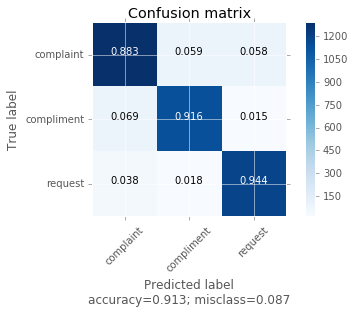

In [61]:
plot_confusion_matrix(cm_fasttext,['complaint','compliment','request'])

In [33]:
len(x_train)
len(y_train)
len(dummy_labels)
len(y_test)
len(x_test)
len(y_test_label_coded)
len(text_train)
len(text_test)


15835

15835

19794

3959

3959

3959

15835

3959

we can see from below that the three categories are roughly equal appearing in both the traing and testing data

In [20]:
print('Number of occurance of three categories in training data are:')
y_train.sum(axis=0)
print('Number of occurance of three categories in testing data are:')
y_test.sum(axis=0)

Number of occurance of three categories in training data are:


array([ 5670.,  5153.,  5012.])

Number of occurance of three categories in testing data are:


array([ 1462.,  1239.,  1258.])

First, we want to use word embeddings to represent each word in the text.  There are two ways to obtain word embeddings:

* Learn word embeddings jointly with the main task you care about (e.g. document classification in our case). 
In this setup, you would start with random word vectors, then learn your word vectors in the same way that you learn the weights of a neural network.
* Load into your model word embeddings that were pre-computed using a different machine learning task than the one you are trying to solve. 
These are called "pre-trained word embeddings", such as Glove.

Let's take a look at both.

### Download the GloVe word embeddings


Head to `https://nlp.stanford.edu/projects/glove/` (where you can learn more about the GloVe algorithm), and download the pre-computed 
embeddings from 2014 English Wikipedia. It's a 822MB zip file named `glove.6B.zip`, containing 100-dimensional embedding vectors for 
400,000 words (or non-word tokens). Un-zip it.

### Pre-process the embeddings


Let's parse the un-zipped file (it's a `txt` file) to build an index mapping words (as strings) to their vector representation (as number 
vectors).

In [31]:
glove_dir = '/home/deeplearning/Downloads'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.



Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, 
embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index 
(built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

In [32]:
embedding_dim = 100

In [33]:
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [147]:
embedding_matrix[:5]

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

### Define a model

We will be using the model architecture with embedding layer plus one hidden layer:

In [148]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 100)          1300000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                384032    
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 99        
Total params: 1,684,131
Trainable params: 1,684,131
Non-trainable params: 0
_________________________________________________________________


### Load the GloVe embeddings in the model


The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with 
index `i`. Simple enough. Let's just load the GloVe matrix we prepared into our `Embedding` layer, the first layer in our model:

In [149]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


Additionally, we freeze the embedding layer (we set its `trainable` attribute to `False`), following the same rationale as what you are 
already familiar with in the context of pre-trained convnet features: when parts of a model are pre-trained (like our `Embedding` layer), 
and parts are randomly initialized (like our classifier), the pre-trained parts should not be updated during training to avoid forgetting 
what they already know. The large gradient updated triggered by the randomly initialized layers would be very disruptive to the already 
learned features.

### Train and evaluate

Let's compile our model and train it:

In [150]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.15
                    #validation_data=(x_val, y_val)
                   )
model.save_weights('pre_trained_glove_model.h5')

Train on 13459 samples, validate on 2376 samples
Epoch 1/10
13459/13459 [==============================] - 9s 641us/step - loss: 0.6813 - acc: 0.7139 - val_loss: 0.5623 - val_acc: 0.7757
Epoch 2/10
13459/13459 [==============================] - 7s 556us/step - loss: 0.4432 - acc: 0.8312 - val_loss: 0.5166 - val_acc: 0.8047
Epoch 3/10
13459/13459 [==============================] - 8s 601us/step - loss: 0.3438 - acc: 0.8712 - val_loss: 0.4601 - val_acc: 0.8304
Epoch 4/10
13459/13459 [==============================] - 7s 530us/step - loss: 0.2707 - acc: 0.9020 - val_loss: 0.4656 - val_acc: 0.8405
Epoch 5/10
13459/13459 [==============================] - 6s 436us/step - loss: 0.1987 - acc: 0.9290 - val_loss: 0.4562 - val_acc: 0.8603
Epoch 6/10
13459/13459 [==============================] - 6s 483us/step - loss: 0.1406 - acc: 0.9552 - val_loss: 0.4264 - val_acc: 0.8670
Epoch 7/10
13459/13459 [==============================] - 6s 445us/step - loss: 0.0955 - acc: 0.9741 - val_loss: 0.4525 - v

Let's plot its performance over time:

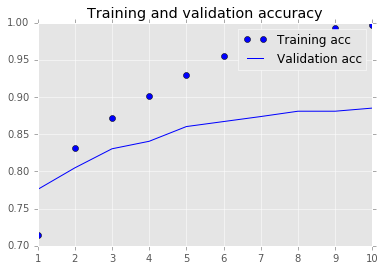

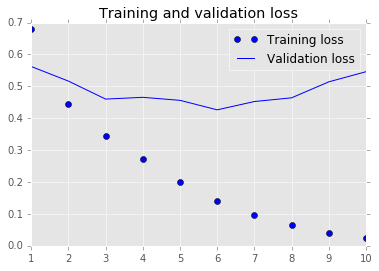

In [151]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


we can see that after 5 epochs, the traing accuracy reaches 99% while validation accuracy stays around 90%

Let's try to learn our own embedding use current text, without using pre-trained Glove embeddings

In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.15
                   # validation_data=(x_val, y_val)
                   )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1300000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 1,620,131
Trainable params: 1,620,131
Non-trainable params: 0
_________________________________________________________________
Train on 16000 samples, validate on 3600 samples
Epoch 1/10
16000/16000 [==============================] - 19s 1ms/step - loss: 0.7089 - acc: 0.6669 - val_loss: 0.4692 - val_acc: 0.8161
Epoch 2/10
16000/16000 [==============================] - 18s 1ms/step - loss:

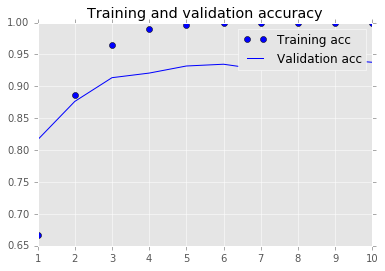

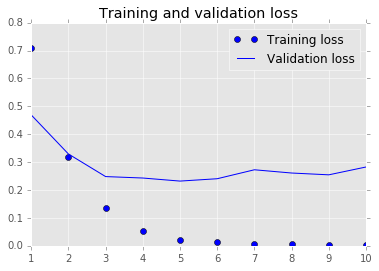

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Validation accuracy stays around 90s, but it only takes 3-4 epochs. So in our case, pre-trained word embeddings outperform rouhly the same for the jointly learned embeddings.

Let's start to do something more interesting. First, let's use the 1D Convolution layer rather than simply unfold the embedding layers 

In [41]:
from keras.layers import Embedding, Flatten, Dense,Dropout, Activation
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras import metrics

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(64,3,
                     padding='valid',
                     activation='relu',
                     strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
history_CNN1 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                         validation_split=0.15
                    #validation_data=(x_val, y_val)
                        )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 100)          1300000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 120, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 118, 64)           19264     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
__________

Now let's Visualize the accuracy for the CNN_model1

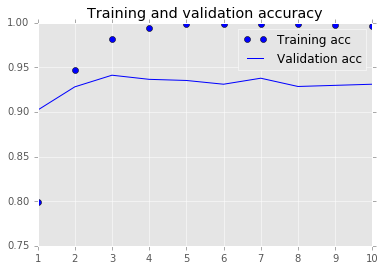

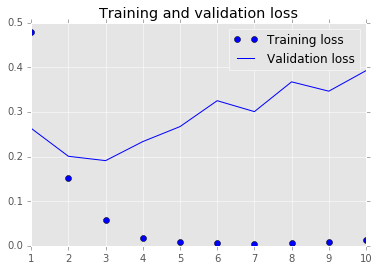

In [42]:
acc = history_CNN1.history['acc']
val_acc = history_CNN1.history['val_acc']
loss = history_CNN1.history['loss']
val_loss = history_CNN1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Now we can see that the validation accuracy jumps to 95%, as early as in Epoch 2. Compared with 90% accuracy where we did not use CNN structure, that's amazing improvement.

## let's try the RNN with LSTM 

In [180]:
from keras.layers import Embedding, Flatten, Dense,Dropout, Activation
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras import metrics
from keras import layers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Dropout(0.2))
model.add(layers.LSTM(32))
#model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
history_LSTM = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    #validation_data=(x_val, y_val)
                     validation_split=0.15   )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 120, 100)          1300000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 120, 100)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                17024     
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 99        
Total params: 1,317,123
Trainable params: 1,317,123
Non-trainable params: 0
_________________________________________________________________
Train on 13459 samples, validate on 2376 samples
Epoch 1/10
13459/13459 [==============================] - 56s 4ms/step - loss: 0.5127 - acc: 0.7952 - val_loss: 0.2696 - val_acc: 0.9061
Epoch 2/10
13459/13459 [==============================] - 54s 4ms/step - loss:

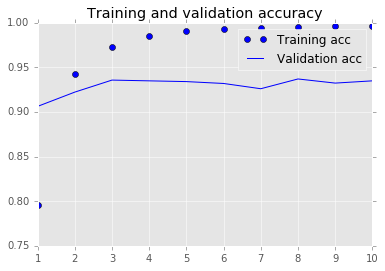

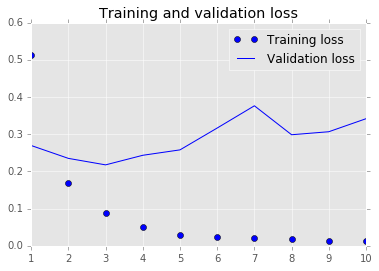

In [181]:
acc = history_LSTM.history['acc']
val_acc = history_LSTM.history['val_acc']
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Let's try Bi-directional LSTM

In [21]:
from keras.layers import Embedding, Flatten, Dense,Dropout, Activation
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras import metrics
from keras import layers

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Dropout(0.2))
#model.add(layers.LSTM(32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
history_LSTM_BiD = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1300000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                34048     
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 1,334,243
Trainable params: 1,334,243
Non-trainable params: 0
_________________________________________________________________
Train on 16000 samples, validate on 3600 samples
Epoch 1/10
16000/16000 [==============================] - 88s 5ms/step - loss: 0.4648 - acc: 0.8138 - val_loss: 0.2660 - val_acc: 0.9069
Epoch 2/10
16000/16000 [==============================] - 88s 5ms/step - loss:

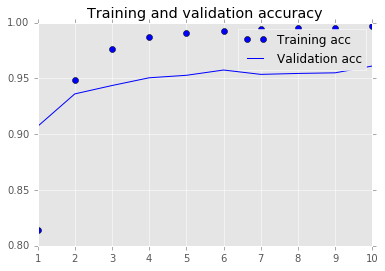

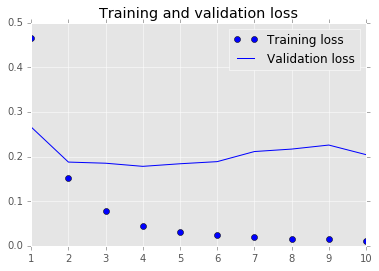

In [23]:
acc = history_LSTM_BiD.history['acc']
val_acc = history_LSTM_BiD.history['val_acc']
loss = history_LSTM_BiD.history['loss']
val_loss = history_LSTM_BiD.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## let's try CNN plus LSTM

In [186]:
from keras.layers import Embedding, Flatten, Dense,Dropout, Activation
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras import metrics

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(64,3,
                     padding='valid',
                     activation='relu',
                     strides=1))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
history_CNN1 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split= 0.15 )
                    #validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 120, 100)          1300000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 120, 100)          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 118, 64)           19264     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 195       
Total params: 1,344,291
Trainable params: 1,344,291
Non-trainable params: 0
_________________________________________________________________
Train on 13459 samples, validate on 2376 samples
Epoch 1/10
13459/13459 [==============================] - 85s 6ms/step - loss: 0.50

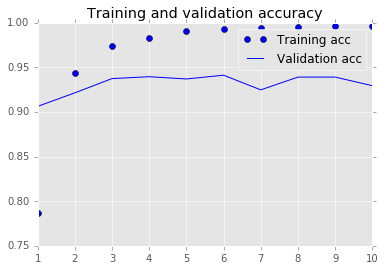

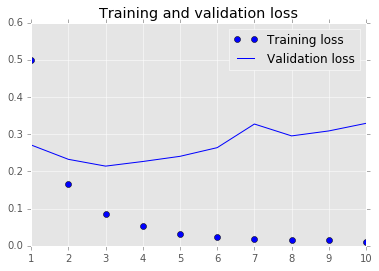

In [187]:
acc = history_CNN1.history['acc']
val_acc = history_CNN1.history['val_acc']
loss = history_CNN1.history['loss']
val_loss = history_CNN1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [38]:
from keras.layers import Embedding, Flatten, Dense,Dropout, Activation
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras import metrics

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(64,3,
                     padding='valid',
                     activation='relu',
                     strides=1))
model.add(Conv1D(32,3,
                     padding='valid',
                     activation='relu',
                     strides=1))
model.add(Conv1D(16,3,
                     padding='valid',
                     activation='relu',
                     strides=1))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
history_CNN2 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    #validation_data=(x_val, y_val)
                        validation_split= 0.15)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1300000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 98, 64)            19264     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 96, 32)            6176      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 94, 16)            1552      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1504)              0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1504)              0         
__________

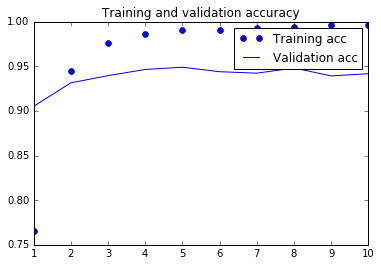

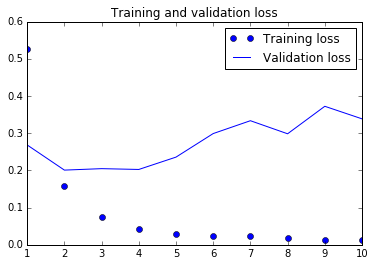

In [39]:
acc = history_CNN2.history['acc']
val_acc = history_CNN2.history['val_acc']
loss = history_CNN2.history['loss']
val_loss = history_CNN2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

And we can see that the accuracy in validation data stays at 94-95s,even though the network structure get more complicated.

Let's try another CNN architecture, similar as what described in https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html

In [58]:
from keras.layers import Embedding, Flatten, Dense,Dropout, Activation
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D,MaxPooling1D 
from keras import metrics

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Conv1D(128,5,activation='relu'))
model.add(MaxPooling1D(pool_length=5))
model.add(Conv1D(128,5,activation='relu'))
model.add(MaxPooling1D(pool_length=17))  ## global max 
model.add(Flatten()) 
model.add(Dense(128))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_24 (Embedding)     (None, 100, 100)          1300000   
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 98, 128)           38528     
_________________________________________________________________
max_pooling1d_33 (MaxPooling (None, 19, 128)           0         
_________________________________________________________________
conv1d_47 (Conv1D)           (None, 17, 128)           49280     
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
__________

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:9: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=5)`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:11: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=17)`


In [59]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
history_CNN3 = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Train on 16000 samples, validate on 3600 samples
Epoch 1/10
16000/16000 [==============================] - 39s 2ms/step - loss: 0.5116 - acc: 0.7778 - val_loss: 0.3174 - val_acc: 0.8750
Epoch 2/10
16000/16000 [==============================] - 39s 2ms/step - loss: 0.1804 - acc: 0.9372 - val_loss: 0.2460 - val_acc: 0.9172
Epoch 3/10
16000/16000 [==============================] - 38s 2ms/step - loss: 0.0766 - acc: 0.9714 - val_loss: 0.2421 - val_acc: 0.9225
Epoch 4/10
16000/16000 [==============================] - 39s 2ms/step - loss: 0.0403 - acc: 0.9849 - val_loss: 0.3568 - val_acc: 0.9114
Epoch 5/10
16000/16000 [==============================] - 40s 2ms/step - loss: 0.0337 - acc: 0.9871 - val_loss: 0.3341 - val_acc: 0.9297
Epoch 6/10
16000/16000 [==============================] - 42s 3ms/step - loss: 0.0349 - acc: 0.9869 - val_loss: 0.3223 - val_acc: 0.9308
Epoch 7/10
16000/16000 [==============================] - 39s 2ms/step - loss: 0.0299 - acc: 0.9882 - val_loss: 0.4142 - val_acc:

Still, there is no obvious improvement

Now let's try to implement CNN with different filter size and concatenate them together, similar as what described in Yoon Kim’s paper 

In [63]:
from keras.layers import Embedding, Flatten, Dense,Dropout, Activation, Concatenate, add,Merge
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras import metrics
from keras.models import Model

In [159]:
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Merge, Dropout
from keras.models import Model
# applying a more complex convolutional approach
convs = []
filter_sizes = [3,4,5]
MAX_SEQUENCE_LENGTH=maxlen

#model.add(Embedding(max_words, embedding_dim, input_length=maxlen))

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')


embedding_layer = Embedding(max_words,
                            embedding_dim,
                            #weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            #trainable=True
                           )

embedded_sequences = embedding_layer(sequence_input)

for fsz in filter_sizes:
    l_conv = Conv1D(nb_filter=64,filter_length=fsz,activation='relu')(embedded_sequences)
    l_pool = MaxPooling1D(5)(l_conv)
    convs.append(l_pool)
    
l_merge = Merge(mode='concat', concat_axis=1)(convs)
l_cov1= Conv1D(64, 5, activation='relu')(l_merge)
l_pool1 = MaxPooling1D(5)(l_cov1)
l_cov2 = Conv1D(64, 5, activation='relu')(l_pool1)
l_pool2 = MaxPooling1D(6)(l_cov2)
l_flat = Flatten()(l_pool2)
l_dense = Dense(128, activation='relu')(l_flat)
preds = Dense(3, activation='softmax')(l_dense)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

print("model fitting - more complex convolutional neural network")
model.summary()

#model.fit(x_train, y_train, validation_data=(x_val, y_val),
 #         nb_epoch=20, batch_size=50)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:25: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=3)`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:25: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=4)`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:25: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=5)`
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:29: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.


model fitting - more complex convolutional neural network
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 120)          0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 120, 100)     1300000     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 118, 64)      19264       embedding_8[0][0]                
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 117, 64)      25664       embedding_8[0][0]                
___________________________________________________

In [160]:
#model.compile(optimizer='adam',
 #             loss='categorical_crossentropy',
  #            metrics=['acc'])
history_CNN_concat = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    #validation_data=(x_val, y_val)
                        validation_split=0.15      )

Train on 13459 samples, validate on 2376 samples
Epoch 1/10
13459/13459 [==============================] - 65s 5ms/step - loss: 0.5536 - acc: 0.7510 - val_loss: 0.3145 - val_acc: 0.8834
Epoch 2/10
13459/13459 [==============================] - 61s 4ms/step - loss: 0.1813 - acc: 0.9363 - val_loss: 0.2425 - val_acc: 0.9158
Epoch 3/10
13459/13459 [==============================] - 65s 5ms/step - loss: 0.0601 - acc: 0.9786 - val_loss: 0.2694 - val_acc: 0.9297
Epoch 4/10
13459/13459 [==============================] - 64s 5ms/step - loss: 0.0349 - acc: 0.9876 - val_loss: 0.3049 - val_acc: 0.9251
Epoch 5/10
13459/13459 [==============================] - 79s 6ms/step - loss: 0.0305 - acc: 0.9881 - val_loss: 0.3407 - val_acc: 0.9200
Epoch 6/10
13459/13459 [==============================] - 69s 5ms/step - loss: 0.0218 - acc: 0.9923 - val_loss: 0.3795 - val_acc: 0.9230
Epoch 7/10
13459/13459 [==============================] - 59s 4ms/step - loss: 0.0153 - acc: 0.9940 - val_loss: 0.4162 - val_acc:

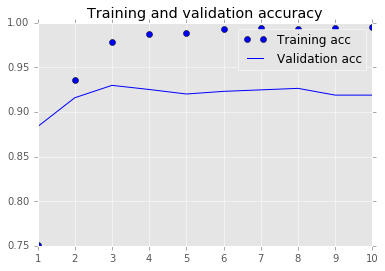

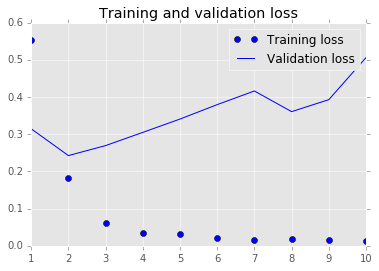

In [161]:
acc = history_CNN_concat.history['acc']
val_acc = history_CNN_concat.history['val_acc']
loss = history_CNN_concat.history['loss']
val_loss = history_CNN_concat.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Again, there is no further improvements

In [50]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(6, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.3f}; misclass={:0.3f}'.format(accuracy, misclass))
    plt.show()

In [162]:
CNNmodel = model

In [171]:
#CNN_output = model.predict_classes(x_test)
CNN_output = np.argmax(model.predict(x_test),axis=1)


In [182]:
#RNN_output = model.predict_classes(x_test)
RNNmodel=model
RNN_output = np.argmax(model.predict(x_test),axis=1)


In [188]:
#RNN_output = model.predict_classes(x_test)
CNNRNNmodel=model
CNNRNN_output = np.argmax(model.predict(x_test),axis=1)


In [172]:
CNN_output[:5]

array([0, 0, 2, 2, 0])

In [183]:
RNN_output[:5]

array([0, 0, 1, 2, 0])

In [189]:
CNNRNN_output[:5]

array([0, 0, 0, 2, 0])

In [173]:
#np.argmax(CNN_output_prob[:5],axis=1)

In [174]:
cm_CNN = confusion_matrix(y_test_label_coded, CNN_output)

In [184]:
cm_RNN = confusion_matrix(y_test_label_coded, RNN_output)

In [49]:
y_test_label_coded[:5]

[0, 0, 0, 2, 0]

In [51]:
y_test_label[:5]

['complaint', 'complaint', 'complaint', 'request', 'complaint']

In [190]:
cm_CNNRNN = confusion_matrix(y_test_label_coded, CNNRNN_output)

In [142]:
coding={'complaint':0,'request':2,'compliment':1}
y_test_label_coded=[coding[k] for k in y_test_label ]

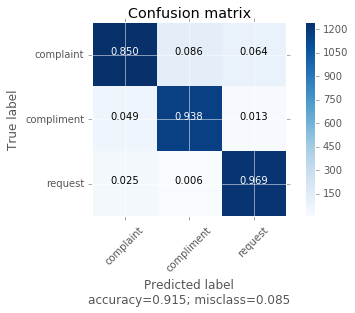

In [179]:
plot_confusion_matrix(cm_CNN,['complaint','compliment','request'])

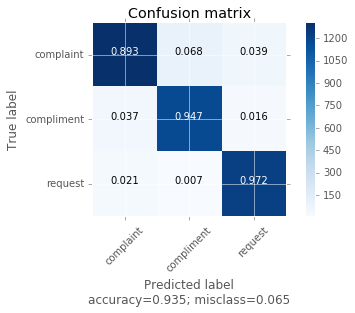

In [185]:
plot_confusion_matrix(cm_RNN,['complaint','compliment','request'])

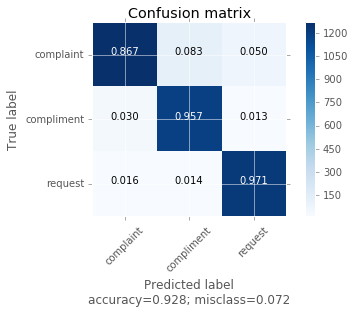

In [191]:
plot_confusion_matrix(cm_CNNRNN,['complaint','compliment','request'])

In [157]:
from sklearn.metrics import confusion_matrix

#labels = ['complain', 'compliment','request']
#cm = confusion_matrix(y_test, CNN_output, labels)

In [154]:
cm = confusion_matrix(y_test_label_coded, CNN_output, )

In [155]:
cm

array([[1109,  187,  166],
       [  59, 1144,   36],
       [  37,   16, 1205]])

In [153]:
len(CNN_output)
len(y_test_label_coded)

3959

3959

In [58]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
 
# loading the iris dataset
iris = datasets.load_iris()
 
# X -> features, y -> label
X = iris.data
y = iris.target
 
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
 
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print (accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

1.0


In [62]:
cm

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

In [63]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])

In [64]:
gnb_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1])